<a href="https://colab.research.google.com/github/Motunrayo244/EDISS-MP/blob/main/EDISS-MP/Data%20Science/Project_work/Project1/First_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of flight Data from Booking Websites


---



## Data Collection: Scrapping the Website


Three websites were scraped for information of flights available on the 18th Deccember 2023 from Helsinki, Finland to Manchester, United kindom. The websites scraped were Booking.com, Kayak.com and Momondo.com with 70, 146, and 143 records obtained from each of them respectively. in total 359 records were obtained from the websites.

The libraries used for web scrapping include
Selenium
Beautiful soup
Selenium-stealth

In [ ]:
# This cell installs all necessary drivers and libraries to the host machine.
# In general, common python libraries like beautiful soup are installed on the runtime. However some uncommon libraries like Selenium and Selenium stealth requires manual installation.
# Also chrom driver was installed on the machine as the web driver to be used is the chrome.
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
sudo apt-get install libvulkan1
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,137 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [515 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [998 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:

In [ ]:
!pip install chromedriver-autoinstaller

In [ ]:
!pip install selenium-stealth

In [ ]:
# import libraries to be used for the first stage Data collection
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import chromedriver_autoinstaller
from selenium import webdriver
from selenium_stealth import stealth
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import requests
import csv



In [ ]:
# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless=new') # ensure GUI is off
chrome_options.add_argument('start-maximized') #sets the browser to maximixed view
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('disable-infobars')
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
chrome_options.add_argument("--ignore-certificate-errors")
chrome_options.add_argument("--window-size=2560,1440") # set specific window size for the browser,
chrome_options.add_argument("--incognito") # set the browser mode to incognito
chrome_options.add_argument('--enable-javascript')
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"]) # selenium stealth option to enable automation
chrome_options.add_experimental_option('useAutomationExtension', False)
chrome_options.add_argument("lang=en")
chrome_options.add_argument("--disable-extensions")



In [ ]:
# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()


'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/117/chromedriver'

#### Kayak and Momondo

It was observed that Kayak.com and Momondo.com had a similar structure and DOM. therefore they were accessed by the same script.

In both website, full details of the flight can be gotten by clicking on a card that shows basic information. This action(click) maximizes the card showing other information that were hidden. To get as many flight information, the show more button was clicked eight times. Then a loop was created to click on each card sequentially.
After this the page source was saved into a variable and beautiful soup was used to extract the features of the flight.

The records were saved into a single csv file.

In [ ]:

urls = ['https://www.kayak.com/flights/HEL-MAN/2023-12-18?sort=bestflight_a',
        'https://www.momondo.com/flight-search/HEL-MAN/2023-12-18?sort=bestflight_a']

In [ ]:
# open a csv file to write the result of the scraped data
csv_file = open('flight_details.csv','w', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['website','airline','flight_time','num_of_stops','stops', 'total_flight_duration','source_to_dest', 'carry_on_bag',
                     'checked_bag', 'price','flight_class','flight_deal_provider','original_departure_date','first_leg_info','flght_times',
                     'flight_stations','flight_durations','flight_carriers','flight_layover_duration','flight_layover_locations',
                     'flight_quality_details','class_features'])

337

In [ ]:
# this script opens the webdriver and navigates through the website to get all the elements required.
driver = webdriver.Chrome(chrome_options)
stealth(driver,
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
        )
for url in urls:
        driver.get(url=url)
        driver.refresh()
        driver.implicitly_wait(5)
        more_buttons = driver.find_element(By.CLASS_NAME,'show-more-button').click()
        # driver.find_element(By.CLASS_NAME,"nrc6-content-section").click()
        WebDriverWait(driver,30,ignored_exceptions=( NoSuchElementException, StaleElementReferenceException)).until(EC.visibility_of_element_located((By.CLASS_NAME,'show-more-button'))).click()
        for _ in range(8):
                try:
                        time.sleep(20)
                        WebDriverWait(driver,40,ignored_exceptions=( NoSuchElementException, StaleElementReferenceException,ElementClickInterceptedException)).until(EC.visibility_of_element_located((By.CLASS_NAME,'show-more-button'))).click()
                except TimeoutException:
                        break


        pop_out_buttons = driver.find_elements(By.CLASS_NAME,"nrc6-content-section")
        for x in range(len(pop_out_buttons)):
          try:
                if pop_out_buttons[x].is_displayed():
                        driver.execute_script("arguments[0].click();", pop_out_buttons[x])
                        time.sleep(1)
          except  StaleElementReferenceException:
              driver.refresh()
              driver.implicitly_wait(5)
              more_buttons = driver.find_element(By.CLASS_NAME,'show-more-button').click()
              # driver.find_element(By.CLASS_NAME,"nrc6-content-section").click()
              WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.CLASS_NAME,'show-more-button'))).click()
              pop_out_buttons = driver.find_elements(By.CLASS_NAME,"nrc6-content-section")
              if pop_out_buttons[x].is_displayed():
                        driver.execute_script("arguments[0].click();", pop_out_buttons[x])
                        time.sleep(1)



        flight_features_button = driver.find_elements(By.CLASS_NAME,"af2q")
        for x in range(len(flight_features_button)):
                try:
                        if flight_features_button[x].is_displayed():
                                driver.execute_script("arguments[0].click();", flight_features_button[x])
                        time.sleep(1)
                except Exception as e :
                        print(e)


        page_source = driver.page_source

        soup = BeautifulSoup(page_source,'lxml')
        flights = soup.find_all('div', class_='nrc6')


        for flight in flights:
                airline = flight.find('div', class_='VY2U').contents[1].text
                flight_time  = flight.find('div', class_='VY2U').contents[0].text
                no_of_stops = flight.find('div', class_='JWEO').contents[0].text
                stops = flight.find('div', class_='JWEO').contents[1].text
                total_flight_duration = flight.find('div', class_='xdW8').contents[0].text
                source_dest = flight.find('div', class_='xdW8').contents[1].text
                carry_on_bag = flight.find('div', class_='ac27').contents[0].text
                checked_bag = flight.find('div', class_='ac27').contents[1].text
                price = flight.find('div', class_='oVHK').text
                flight_class = flight.find('div', class_='aC3z').text
                flight_deal_provider  = flight.find('div', class_='M_JD-provider-name').text

                if flight.find('span', class_='X3K_-header-text') is None:
                        original_departure_date= ''
                else:
                        original_departure_date = flight.find('span', class_='X3K_-header-text').text.split(',')[1]
                # original_departure_date = flight.find('span', class_='X3K_-header-text').text.split(',')[1]

                if flight.find('div', class_='nAz5-carrier-text') is None:
                        first_leg_info = ''
                else:
                        first_leg_info = flight.find('div', class_='nAz5-carrier-text').text
                # first_leg_info = flight.find('div', class_='nAz5-carrier-text').text

                flight_details = flight.find_all('div', class_='g16k')
                times=[]
                stations = []
                for detail in flight_details:
                        times.append(detail.find('span', class_='g16k-time').text)
                        stations.append(detail.find('span', class_='g16k-station').text)

                # flight_durations = flights.find_all('div', class_='nAz5-duration-text')
                durations = [duration.text for duration in flight.find_all('div', class_='nAz5-duration-text')]
                carriers = [carrier.text for carrier in flight.find_all('div', class_='nAz5-carrier-text')]

                layover_times= []
                layover_locations = []
                layovers = flight.find_all('div', class_='c62AT')
                for layover in layovers:
                        layover_times.append(layover.find('div', class_='c62AT-layover-info').contents[0].text)
                        layover_locations.append(layover.find('div', class_='c62AT-layover-info').contents[2].text)

                flight_quality_details = flight.find_all('div', class_='af2q-quality-items')
                flight_quality_detail = [
                        [q.text for q in q_detail.find_all('span', class_='af2q-qmsg')]
                        for q_detail in flight_quality_details
                ]

                class_feature = flight.find_all('img', class_='X9mO-thumb-img')
                class_features =[feature['alt'] for feature in class_feature]

                csv_writer.writerow([url.split('/')[2],airline,flight_time,no_of_stops,stops,total_flight_duration,source_dest,carry_on_bag,checked_bag,
                                     price,flight_class,flight_deal_provider,original_departure_date,first_leg_info,times,stations,durations,carriers,
                                     layover_times,layover_locations,flight_quality_detail,class_features])


csv_file.close()
driver.quit()




### Booking.Com
The booking.com website has a different structure, hence the method used to scrape it was different than the other two. Unlike the other two websites, Booking.com utilizes an overlay to show the full details of the flight, making it a little bit more complicated. Also there are no show more buttons as the website was paginated. To collect flight record, the approach used was to save all the see flight buttons present in one page on a list. By iterating through the list each button was then clicked to get the information in the overlay. To obtain adequate record. 7 pages were looped through. In booking.com most of the flight informatio

In [ ]:
with open('flight_details_booking_com.csv','w', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['website','flight_duration_and_stop','baggage_info','price','flight_info','flight_details','flight_layover'])
        driver = webdriver.Chrome(chrome_options)
        stealth(driver,
                languages=["en-US", "en"],
                vendor="Google Inc.",
                platform="Win32",
                webgl_vendor="Intel Inc.",
                renderer="Intel Iris OpenGL Engine",
                fix_hairline=True,
                )


        for i in range(1,8):
          driver = webdriver.Chrome(chrome_options)
          stealth(driver,
                languages=["en-US", "en"],
                vendor="Google Inc.",
                platform="Win32",
                webgl_vendor="Intel Inc.",
                renderer="Intel Iris OpenGL Engine",
                fix_hairline=True,
                )

          url = f'https://flights.booking.com/flights/HEL.AIRPORT-MAN.AIRPORT?type=ONEWAY&adults=1&cabinClass=ECONOMY&children=&from=HEL.AIRPORT&to=\
        MAN.AIRPORT&fromCountry=FI&toCountry=GB&fromLocationName=Helsinki-Vantaa+Airport&toLocationName=Manchester+Airport&depart=2023-12-18&sort=\
        BEST&travelPurpose=leisure&aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaEiIAQGYAQm4ARfIAQzYAQHoAQH4AQyIAgGoAgO4ArfQwKgGwAIB0gIkODczYWI5NTEtNzQ2Ni00Y2Yy\
        LWI3ZGMtZDgxZjU4OTVkZDM22AIG4AIB&page={i}'

          driver.get(url=url)
            # print(f'starting page {i}')
            # driver.refresh()
          driver.implicitly_wait(5)
          if i == 1:
                  i=1
                  #driver.find_element(By.ID, 'onetrust-accept-btn-handler').click()
          else:
                driver.refresh()
          driver.implicitly_wait(5)
          # full_page = driver.page_source
          # page_soup = BeautifulSoup(full_page, 'lxml')
          # flight_cards = page_soup.find_all('div', class_='css-209ldq')
          # time.sleep(3)
          flight_buttons = driver.find_elements(By.CLASS_NAME,'css-1nt3u54')
          time.sleep(3)
          # flight_cards = driver.find_elements(By.CLASS_NAME,'css-209ldq')

          for button in flight_buttons:
            try:
              time.sleep(10)
              button.click()
              time.sleep(10)
              WebDriverWait(driver,30,ignored_exceptions=(NoSuchElementException, StaleElementReferenceException)).until(EC.visibility_of_element_located((By.CLASS_NAME,'SheetContainer-module__content___dCG7f')))

              driver.find_element(By.CLASS_NAME,'SheetContainer-module__content___dCG7f')
              page_source = driver.page_source
              soup = BeautifulSoup(page_source,'lxml')

              # airline = card.find('div', class_='css-1dimx8f').text if card.find('div', class_='css-1dimx8f')!= None else ''
              # flight_time_div  = card.find_all('div', class_='css-1yl6p1k')
              # flight_time = str(flight_time_div[0].find('div', class_='Text-module__root--variant-strong_1___SNYxf').text) + ' - ' + \
                      # str (flight_time_div[1].find('div', class_='Text-module__root--variant-strong_1___SNYxf').text)
              # no_of_stops = soup.find('div', class_='HiddenVisually-module__root___CwnlX').text.split(' ')[0]


              flight_duration_and_stop = soup.find('div', class_='Text-module__root--variant-body_2___-DHx6 css-3estlk').text
              included_baggage = soup.find_all('div', class_='css-mszfpc')
              baggage_info = [bag.text for bag in included_baggage]
              price =  soup.find('div', class_='css-vxcmzt').text

              flight_infos = soup.find_all('div', class_='css-1yleisv')
              flight_info = []
              for info in flight_infos:
                      leg = [content.text for content in info.contents]
                      flight_info.append(leg)

              flight_details = soup.find_all('div', class_='css-1rr4qq7')
              flight_detail =[]
              for info in flight_details:
                      leg = [content.text for content in info.contents]
                      flight_detail.append(leg)


              flight_layovers = soup.find_all('div', class_='css-vvcyi3')
              flight_layover =[]
              for layover in flight_layovers:
                      leg = [content.text for content in layover.contents]
                      flight_layover.append(leg)

              csv_writer.writerow(['www.booking.com', flight_duration_and_stop,baggage_info,price,flight_info,
                                      flight_detail,flight_layover])

              # tracker = soup.find('div', class_='Text-module__root--variant-body_2___-DHx6 css-1mz4lto')
              actionChains = ActionChains(driver)

              actionChains.move_by_offset(2, 5)
              actionChains.click().perform()

              # close_modal = driver.find_element(By.XPATH,'/html/body/div[5]/div/div/div/div/div[1]/div[2]')
              # close_modal.click()

              # /html/body/div[5]/div/div/div/div/div[1]/div[2]
              # WebDriverWait(driver,20,(ElementClickInterceptedException)).until(EC.visibility_of_element_located((By.CLASS_NAME, 'Button-module__root--variant-tertiary-neutral___tEjZX'))).click()

              # driver.find_element(By.CLASS_NAME, 'Button-module__icon___sDvkX').click()
              time.sleep(3)

            except NoSuchElementException as e:
              actionChains = ActionChains(driver)

              actionChains.move_by_offset(2, 5)
              actionChains.click().perform()
              driver.refresh()
              time.sleep(5)
              continue
            except TimeoutException  as e:
              actionChains = ActionChains(driver)

              actionChains.move_by_offset(2, 5)
              actionChains.click().perform()
              driver.refresh()
              continue
            except StaleElementReferenceException as e:
              actionChains = ActionChains(driver)
              actionChains.move_by_offset(2, 5)
              actionChains.click().perform()
              driver.refresh()
              flight_buttons = driver.find_elements(By.CLASS_NAME,'css-1nt3u54')
              time.sleep(3)
              continue
          driver.quit()

csv_file.close()




## Data Preprocessing

In this stage, the data from all websites are manipulated to get similar features.
This involves the extraction of features from the initial data format. Cleaning the data, and ensuring that each column represents a single feature.

The data for booking.com had 6 columns about the flight and one column for the website name before preprocessing. After preprocessing, 25 flight features were obtained giving 26 features in total.

In [1]:
!pip install pyairports
from pyairports.airports import Airports

from collections import namedtuple

from matplotlib import pyplot as plt
from os.path  import basename
import time
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
#read the csv data for booking.com
booking_df = pd.read_csv("https://raw.githubusercontent.com/Motunrayo244/EDISS-MP/main/Data%20Science/Project_work/Project1/flight_details_booking_com_real.csv")


In [3]:
#Preview the data
booking_df.head(2)

,website,flight_duration_and_stop,baggage_info,price,flight_info,flight_details,flight_layover
0,www.booking.com,1 stop · 5h 00m,['1 personal itemFits under the seat in front ...,$138.96,"[['SAS', 'SK1705 · Economy', 'Flight time 1h 4...","[['Mon 18 Dec · 06:30HEL · Helsinki', 'Mon 18 ...",[['Mon 18 Dec · 06:30HEL · HelsinkiMon 18 Dec ...
1,www.booking.com,Direct · 3h 05m,['1 personal itemFits under the seat in front ...,$138.96,"[['Finnair', 'AY1361 · Economy', 'Flight time ...","[['Mon 18 Dec · 08:10HEL · Helsinki', 'Mon 18 ...",[['Mon 18 Dec · 08:10HEL · HelsinkiMon 18 Dec ...


In [4]:
#The data extracted from booking.com had 7 columns and 70 records
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   website                   70 non-null     object
 1   flight_duration_and_stop  70 non-null     object
 2   baggage_info              70 non-null     object
 3   price                     70 non-null     object
 4   flight_info               70 non-null     object
 5   flight_details            70 non-null     object
 6   flight_layover            70 non-null     object
dtypes: object(7)
memory usage: 4.0+ KB


In [5]:

# extract information about the airlines from the flight_info column
def extract_airline(flight_info:str)->str:
  airline = ''
  flight_data = flight_info.split('],')
  for data in flight_data:
    data = data.replace('[','').replace("'",'').split(',')[0].strip()
    if len(airline)>0:
      airline = f"{airline}, {data}"
    else:
      airline = f"{data}"
  return airline

# extract information about the departure and arrival time from the flight_details column
def start_end_time(flight_details:str)->str:
  schedule =[]
  x_s = flight_details.split('],')
  for x in x_s:
    if 'Dec' in x:
      schedule.append(x)

  if len(schedule) > 1:
    return schedule[0].replace('[','').replace("'",'').split(',')[0].split(' · ')[1].strip()[0:5] + " - "\
  + schedule[-1].replace('[','').replace("'",'').split(',')[0].split(' · ')[1].strip()[0:5]
  else:
      return schedule[0].replace('[','').replace("'",'').split(',')[0].split(' · ')[1].strip()[0:5] + " - "\
  + schedule[-1].replace('[','').replace("'",'').split(',')[1].split(' · ')[1].strip()[0:5]

# Extracts the number of layovers from the flight_info column
def extract_flight_stop(flight_info:str)->int:
  list_ = flight_info.strip().split(' · ')
  if flight_info.strip().split(' · ')[0] == 'Direct':
    return 0
  else:
    return int(flight_info.strip().split(' · ')[0].strip().split(' ')[0])


# Extracts the total durations from the flight_info column
def extract_flight_duration(flight_info:str)->float:
  list_ = flight_info.strip().split(' · ')
  list_ = list_[1].split(' ')

  if len(list_[0])>2:
    list_ = round(float(list_[0][0:2]) + float(list_[1][0:2])/60,3)
  else:
    list_ = round(float(list_[0][0]) + float(list_[1][0:2])/60,3)

  return list_

# Extract information about the types of bags allowed from the baggage info column
def extract_baggage_info(baggage_info,bag_type):
  if baggage_info.find(bag_type)>=2:
    return  int(baggage_info[baggage_info.find(bag_type) - 2])
  else:
    return 0
# extracts the flight's class
def extract_class(flight_info:str)->str:
  flight_class = ''
  flight_data = flight_info.split('],')
  for data in flight_data:
    data = data.replace('[','').replace("'",'').split(',')
    if len(data)== 4:
      data = data[1].split(' · ')[1].strip()
    else:
        data = data[2].split(' · ')[1].strip()
    if len(flight_class)>0:
      if flight_class != data:
         flight_class = f"{flight_class}, {data}"
    else:
      flight_class=data
  return flight_class

#Extract layover duration
def extract_layover_times(flight_layover_info:str):
  flight_data = flight_layover_info.split("'],")
  layovers = [
      data.replace("['', '", '').strip().split('Layover')[1]
      for data in flight_data if 'Layover' in data
  ]
  times =[]
  for layover in layovers:
    if 'h' in layover:
      time_ =    layover.strip().split(' ')
      time = round (float(time_[0].replace('h','')) + float(time_[1].replace('m',''))/60, 3)
    else:
      time = round(float(layover.replace('m',''))/60, 3)
    times.append(time)
  return times if len(times)>0 else [0]

#Extract the duration of each flight
def extract_flight_time(flight_info:str):
  flight_time = []
  flight_data = flight_info.split('],')
  for data in flight_data:
    data = data.replace('[','').replace("'",'').split(',')
    if len(data) == 4:
      data = data[2].split('time')[1]
    else:
      data = data[3].split('time')[1]

    if 'h' in data:
      time_ =    data.strip().split(' ')
      data = round (float(time_[0].replace('h','')) + float(time_[1].replace('m',''))/60, 3)
    else:
      data = round(float(data.replace('m',''))/60, 3)
    flight_time.append(data)

  return flight_time

# Extract the flight number from flight info
def extract_flight_number(flight_info:str):
  flight_number = []
  flight_data = flight_info.split('],')
  for data in flight_data:
    data = data.replace('[','').replace("'",'').split(',')
    if len(data) == 4:
      data = data[1].split(' · ')[0]
    else:
      data = data[2].split(' · ')[0]
    flight_number.append(data.strip())

  return flight_number
#Extract layover location
def extract_layover_location(flight_layover_info:str):
  flight_data = flight_layover_info.split("'],")

  if len(flight_data) >1:
    return [
        data.replace("[", '').replace("'", '').strip().split(',')[0].split(
            ' · ')[-2].strip().split(':')[1][2:] # data.replace("[", '').replace("'", '').strip().split(',')[0].split(' · ')[-1].strip()
         for data in flight_data
        if 'Layover' not in data and 'Manchester' not in data and 'change' not in data.lower() and 'Baggage' not in data and 'transfer' not in data
    ]
  else: return [""]



In [6]:
# This cell uses the values un the booking dataframe to create a new dataframe after applying the various methods
booking_new_df = pd.DataFrame()
booking_new_df['website'] = booking_df['website']
booking_new_df['airline'] = booking_df['flight_info'].apply(extract_airline)
booking_new_df['flight_time'] = booking_df['flight_details'].apply(start_end_time)
booking_new_df['num_of_stops'] = booking_df['flight_duration_and_stop'].apply(extract_flight_stop)
booking_new_df['total_flight_duration']=  booking_df['flight_duration_and_stop'].apply(extract_flight_duration)
booking_new_df['cabin_bags'] = booking_df.apply(lambda x: extract_baggage_info(x['baggage_info'],'cabin bag'),axis=1)
booking_new_df['checked_bags'] = booking_df.apply(lambda x: extract_baggage_info(x['baggage_info'],'checked bag'),axis=1)
booking_new_df['personal_items'] = booking_df.apply(lambda x: extract_baggage_info(x['baggage_info'],'personal item'),axis=1)
booking_new_df['price_dollars'] = booking_df['price'].apply(lambda x: float(x[1:]))
booking_new_df['flight_class'] = booking_df['flight_info'].apply(extract_class)
booking_new_df['layover_times'] = booking_df['flight_layover'].apply(extract_layover_times)
booking_new_df['flight_leg_time'] = booking_df['flight_info'].apply(extract_flight_time)
booking_new_df['flight_no'] = booking_df['flight_info'].apply(extract_flight_number)
booking_new_df['layover_location'] = booking_df['flight_layover'].apply(extract_layover_location)
booking_new_df['departure_time'] = booking_new_df['flight_time'].apply(lambda x: x.split('-')[0].strip())
booking_new_df['arrival_time'] = booking_new_df['flight_time'].apply(lambda x: x.split('-')[1].strip())
booking_new_df['first_layover_duration(hr)'] = booking_new_df['layover_times'].apply(lambda x: x[0])
booking_new_df['second_layover_duration(hr)'] = booking_new_df['layover_times'].apply(lambda x: x[1] if len(list(x))>1 else 0)
booking_new_df['first_layover_location'] = booking_new_df['layover_location'].apply(lambda x: list(x)[0].strip() if len(list(x)) > 0 else '')
booking_new_df['second_layover_location'] = booking_new_df['layover_location'].apply(lambda x: list(x)[1].strip() if len(list(x)) > 1 else '')
booking_new_df['first_leg_duration(hr)'] = booking_new_df['flight_leg_time'].apply(lambda x: list(x)[0] if len(list(x)) > 0 else 0)
booking_new_df['second_leg_duration(hr)'] = booking_new_df['flight_leg_time'].apply(lambda x: list(x)[1] if len(list(x)) > 1 else 0)
booking_new_df['third_leg_duration(hr)'] = booking_new_df['flight_leg_time'].apply(lambda x: list(x)[2] if len(list(x)) > 2 else 0)
booking_new_df['first_airplane_number'] = booking_new_df['flight_no'].apply(lambda x: list(x)[0] if len(list(x)) > 0 else '')
booking_new_df['second_airplane_number'] = booking_new_df['flight_no'].apply(lambda x: list(x)[1] if len(list(x)) > 1 else '')
booking_new_df['third_airplane_number'] = booking_new_df['flight_no'].apply(lambda x: list(x)[2] if len(list(x)) > 2 else '')

# first_key = list(student_name.keys())[0]

booking_new_df.head(5)

,website,airline,flight_time,num_of_stops,total_flight_duration,cabin_bags,checked_bags,personal_items,price_dollars,flight_class,...,first_layover_duration(hr),second_layover_duration(hr),first_layover_location,second_layover_location,first_leg_duration(hr),second_leg_duration(hr),third_leg_duration(hr),first_airplane_number,second_airplane_number,third_airplane_number
0,www.booking.com,"SAS, SAS",06:30 - 08:30,1,5.000,0,0,1,138.96,Economy,...,1.250,0.0,CPH,,1.750,2.00,0.0,SK1705,SK539,
1,www.booking.com,Finnair,08:10 - 09:15,0,3.083,1,1,1,138.96,Economy,...,0.000,0.0,,,3.083,0.00,0.0,AY1361,,
2,www.booking.com,British Airways,08:10 - 09:15,0,3.083,1,1,1,138.96,Economy,...,0.000,0.0,,,3.083,0.00,0.0,BA6003,,
3,www.booking.com,"SAS, SAS",11:05 - 18:35,1,10.750,0,0,1,138.96,Economy,...,6.917,0.0,OSL,,1.583,2.25,0.0,SK2701,SK4610,
4,www.booking.com,"SAS, SAS",06:30 - 17:35,1,14.083,0,0,1,138.96,Economy,...,10.333,0.0,CPH,,1.750,2.00,0.0,SK1705,SK541,


In [7]:
# read the data for kayak and momondo
kay_mom_df = pd.read_csv("https://raw.githubusercontent.com/Motunrayo244/EDISS-MP/main/Data%20Science/Project_work/Project1/flight_details.csv")

In [8]:
kay_mom_df.head(2)

,website,airline,flight_time,num_of_stops,stops,total_flight_duration,source_to_dest,carry_on_bag,checked_bag,price,...,original_departure_date,first_leg_info,flght_times,flight_stations,flight_durations,flight_carriers,flight_layover_duration,flight_layover_locations,flight_quality_details,class_features
0,www.kayak.com,Scandinavian Airlines,6:30 am–9:30 am,1 stop,CPH,5h 00m,HEL-MAN,0.0,0,$127,...,Dec 18,Scandinavian Airlines 1705,"['6:30 am', '7:15 am', '8:30 am', '9:30 am']","['Helsinki-Vantaa (HEL)', 'Kastrup Copenhagen ...","['1h 45m', '2h 00m']","['Scandinavian Airlines 1705', 'Scandinavian A...",['1h 15m'],['Change planes in Copenhagen (CPH)'],"[['Airbus A320neo (Narrow-body jet)', 'Chance ...",[]
1,www.kayak.com,Finnair,8:10 am–9:15 am,nonstop,NaN,3h 05m,HEL-MAN,NaN,0,$157,...,Dec 18,Finnair 1361,"['8:10 am', '9:15 am']","['Helsinki-Vantaa (HEL)', 'Manchester (MAN)']",['3h 05m'],['Finnair 1361'],[],[],"[['Airbus A321 (sharklets) (Narrow-body jet)',...",['Finnair Economy']


In [9]:
kay_mom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   website                   289 non-null    object 
 1   airline                   289 non-null    object 
 2   flight_time               289 non-null    object 
 3   num_of_stops              289 non-null    object 
 4   stops                     284 non-null    object 
 5   total_flight_duration     289 non-null    object 
 6   source_to_dest            289 non-null    object 
 7   carry_on_bag              288 non-null    float64
 8   checked_bag               289 non-null    int64  
 9   price                     289 non-null    object 
 10  flight_class              289 non-null    object 
 11  flight_deal_provider      289 non-null    object 
 12  original_departure_date   271 non-null    object 
 13  first_leg_info            271 non-null    object 
 14  flght_time

In [10]:
# convert time from 12 hours format to 24 hrs format to ensure uniformity with the data from booking.com
def convert_time_24 (timestr:str):
  if 'am' in timestr.lower():
    return timestr.split(' ')[0]
  elif  'pm' in timestr.lower():
    part = timestr.lower().replace(' pm','').split(':')
    if part[0] != '12':
      h = (int(part[0])+ 12)
    else:
      h = part[0]
    return str(h)+':'+ part[1]
  else:
    return timestr
# convert duration to float
def convert_dur_to_float(duration:str):
   duration = round(float(duration.strip().split(' ')[0].replace('h', '').strip())
        + float(duration.strip().split(' ')[1].replace('m', '').strip())/60,3 )
   return duration

In [11]:
kay_mom_new_df = pd.DataFrame()
kay_mom_new_df['website'] =kay_mom_df['website']
kay_mom_new_df['airline'] =kay_mom_df['airline']
kay_mom_new_df['departure_time'] = kay_mom_df['flight_time'].apply(lambda x: convert_time_24(x.split('–')[0]))
kay_mom_new_df['arrival_time'] = kay_mom_df['flight_time'].apply(lambda x: convert_time_24(x.split('–')[1]))
kay_mom_new_df['num_of_stops'] = kay_mom_df['num_of_stops'].apply(lambda x: int(x.split(' ')[0]) if len(x.split(' '))>1 else 0)
kay_mom_new_df['total_flight_duration'] = kay_mom_df['total_flight_duration'].apply(lambda x: round(float(x.split(' ')[0].replace('h', '').strip())
                                                      + float(x.split(' ')[1].replace('m', '').strip())/60,3 ))
kay_mom_new_df['cabin_bags'] = kay_mom_df['carry_on_bag'].apply(lambda x: x).fillna(0).astype(int)
kay_mom_new_df['checked_bags'] = kay_mom_df['checked_bag'].apply(lambda x: x).fillna(0)
kay_mom_new_df['personal_items'] = 'NA'
kay_mom_new_df['price_dollars'] = kay_mom_df['price'].apply(lambda x: float(x[1:].replace(',','')))
kay_mom_new_df['flight_class'] =kay_mom_df['flight_class']

kay_mom_new_df['first_layover_duration(hr)'] = kay_mom_df['flight_layover_duration'].apply( lambda x: convert_dur_to_float(x.replace("[", '').replace("]", '').replace("'",'').split(',')[0])
                                                  if len(x)> 2
                                                  else 0)

kay_mom_new_df['second_layover_duration(hr)'] = kay_mom_df['flight_layover_duration'].apply(
                                                  lambda x: convert_dur_to_float(x.replace("[", '').replace("]", '').replace("'",'').split(',')[1])
                                                  if len(x.replace("[", '').replace("]", '').replace("'",'').split(','))> 1
                                                  else 0)

kay_mom_new_df['first_layover_location'] = kay_mom_df['stops'].fillna('').astype(str).apply(lambda x: x.split(',')[0].strip() if len(x)>0 else '')
kay_mom_new_df['second_layover_location'] = kay_mom_df['stops'].fillna('').astype(str).apply(lambda x: x.split(',')[1].strip() if len(x.split(','))>1 else '')

kay_mom_new_df['first_leg_duration(hr)'] = kay_mom_df['flight_durations'].apply(lambda x: convert_dur_to_float(x.replace("[", '').replace("]", '').replace("'",'').split(',')[0])
                                          if len(x)>2 else 0)
kay_mom_new_df['second_leg_duration(hr)'] = kay_mom_df['flight_durations'].apply(lambda x: convert_dur_to_float(x.replace("[", '').replace("]", '').replace("'",'').split(',')[1])
                                          if len(x.replace("[", '').replace("]", '').replace("'",'').split(','))> 1 else 0)
kay_mom_new_df['third_leg_duration(hr)'] = kay_mom_df['flight_durations'].apply(lambda x: convert_dur_to_float(x.replace("[", '').replace("]", '').replace("'",'').split(',')[2])
                                          if len(x.replace("[", '').replace("]", '').replace("'",'').split(','))> 2 else 0)

kay_mom_new_df['first_airplane_number'] = kay_mom_df['flight_carriers'].apply(lambda x: x.replace("[", '').replace("]", '').replace("'",'').split(',')[0].split(' · ')[0] if len(x)>0 else '')
kay_mom_new_df['second_airplane_number'] = kay_mom_df['flight_carriers'].apply(lambda x: x.replace("[", '').replace("]", '').replace("'",'').split(',')[1].split(' · ')[0]
                                            if len(x.replace("[", '').replace("]", '').replace("'",'').split(','))>1 else '')
kay_mom_new_df['third_airplane_number'] = kay_mom_df['flight_carriers'].apply(lambda x: x.replace("[", '').replace("]", '').replace("'",'').split(',')[1].split(' · ')[0]
                                                                    if len(x.replace("[", '').replace("]", '').replace("'",'').split(','))> 2 else '')

kay_mom_new_df['first_airplane_type'] = kay_mom_df['flight_quality_details'].apply(lambda x: x.split('],')[0].split(',')[0].replace('[','').replace("'",'').replace(']','') )
kay_mom_new_df['second_airplane_type'] = kay_mom_df['flight_quality_details'].apply(lambda x: x.split('],')[1].split(',')[0].replace('[','').replace("'",'').replace(']','')
                                                  if len(x.split('],'))>1 else 'NA')
kay_mom_new_df['third_airplane_type'] = kay_mom_df['flight_quality_details'].apply(lambda x: x.split('],')[2].split(',')[0].replace('[','').replace("'",'')
                                                  if len(x.split('],'))>2 else 'NA')



'''
[
  ['Airbus A320neo (Narrow-body jet)', 'Chance of Wi-Fi (fee)', 'USB outlet', '30" seat pitch', 'Snacks (fee)'],
   ['Airbus A320neo (Narrow-body jet)', 'Chance of Wi-Fi (fee)', 'USB outlet', '30" seat pitch', 'Snacks (fee)']]
'''




kay_mom_new_df.head(5)

,website,airline,departure_time,arrival_time,num_of_stops,total_flight_duration,cabin_bags,checked_bags,personal_items,price_dollars,...,second_layover_location,first_leg_duration(hr),second_leg_duration(hr),third_leg_duration(hr),first_airplane_number,second_airplane_number,third_airplane_number,first_airplane_type,second_airplane_type,third_airplane_type
0,www.kayak.com,Scandinavian Airlines,6:30,9:30,1,5.000,0,0,NA,127.0,...,,1.750,2.000,0.000,Scandinavian Airlines 1705,Scandinavian Airlines 539,,Airbus A320neo (Narrow-body jet),Airbus A320neo (Narrow-body jet),NA
1,www.kayak.com,Finnair,8:10,9:15,0,3.083,0,0,NA,157.0,...,,3.083,0.000,0.000,Finnair 1361,,,Airbus A321 (sharklets) (Narrow-body jet),NA,NA
2,www.kayak.com,Norwegian,14:10,20:15,2,8.083,0,0,NA,110.0,...,SVG,1.583,0.917,1.583,Norwegian 1191,Norwegian 538,Norwegian 538,Boeing 737-800 (winglets) (Narrow-body jet),Boeing 737-800 (winglets) (Narrow-body jet),Boeing 737-800 (winglets) (Narrow-body jet)
3,www.kayak.com,British Airways,8:10,9:15,0,3.083,1,1,NA,278.0,...,,3.083,0.000,0.000,British Airways 6003,,,Airbus A321 (sharklets) (Narrow-body jet),NA,NA
4,www.kayak.com,Scandinavian Airlines,6:30,9:30,1,5.000,0,0,NA,127.0,...,,1.750,2.000,0.000,Scandinavian Airlines 1705,Scandinavian Airlines 539,,Airbus A320neo (Narrow-body jet),Airbus A320neo (Narrow-body jet),NA


In [12]:
#Join the two data set dropping the some features that are not needed anymore.
# 'flight_time','layover_times', 'flight_leg_time', 'flight_no', 'layover_location' were dropped from the new booking dataset
#Columns like first_airplane_type, second_airplane_type and third_airplane_type are not available in booking.com
#Hence the total number of colums after the join will be 24
from datetime import datetime, timedelta
full_df = pd.concat([kay_mom_new_df,booking_new_df.drop(['flight_time','layover_times',
       'flight_leg_time', 'flight_no', 'layover_location'],axis=1,inplace=False)],join='outer',ignore_index=True)

In [13]:
full_df.head(2)

,website,airline,departure_time,arrival_time,num_of_stops,total_flight_duration,cabin_bags,checked_bags,personal_items,price_dollars,...,second_layover_location,first_leg_duration(hr),second_leg_duration(hr),third_leg_duration(hr),first_airplane_number,second_airplane_number,third_airplane_number,first_airplane_type,second_airplane_type,third_airplane_type
0,www.kayak.com,Scandinavian Airlines,6:30,9:30,1,5.000,0,0,NA,127.0,...,,1.750,2.0,0.0,Scandinavian Airlines 1705,Scandinavian Airlines 539,,Airbus A320neo (Narrow-body jet),Airbus A320neo (Narrow-body jet),NA
1,www.kayak.com,Finnair,8:10,9:15,0,3.083,0,0,NA,157.0,...,,3.083,0.0,0.0,Finnair 1361,,,Airbus A321 (sharklets) (Narrow-body jet),NA,NA


In [14]:
full_df.shape

(359, 24)

In [15]:
# The following can be sited from an overview of the information about the dataset
#1. Missing data for the last three columns
#2. the data type of departuretime and arrival_time is object
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   website                      359 non-null    object 
 1   airline                      359 non-null    object 
 2   departure_time               359 non-null    object 
 3   arrival_time                 359 non-null    object 
 4   num_of_stops                 359 non-null    int64  
 5   total_flight_duration        359 non-null    float64
 6   cabin_bags                   359 non-null    int64  
 7   checked_bags                 359 non-null    int64  
 8   personal_items               359 non-null    object 
 9   price_dollars                359 non-null    float64
 10  flight_class                 359 non-null    object 
 11  first_layover_duration(hr)   359 non-null    float64
 12  second_layover_duration(hr)  359 non-null    float64
 13  first_layover_locati

In [16]:
#There are missing values for the 70 records from booking.com for first_airplane_type, second_airplane_type and third_airplane_type
#Fill the column with  NA which implies  Not Available
full_df.fillna('NA',inplace=True)

In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   website                      359 non-null    object 
 1   airline                      359 non-null    object 
 2   departure_time               359 non-null    object 
 3   arrival_time                 359 non-null    object 
 4   num_of_stops                 359 non-null    int64  
 5   total_flight_duration        359 non-null    float64
 6   cabin_bags                   359 non-null    int64  
 7   checked_bags                 359 non-null    int64  
 8   personal_items               359 non-null    object 
 9   price_dollars                359 non-null    float64
 10  flight_class                 359 non-null    object 
 11  first_layover_duration(hr)   359 non-null    float64
 12  second_layover_duration(hr)  359 non-null    float64
 13  first_layover_locati

In [18]:
full_df['website'].unique() #confirm the three websites

array(['www.kayak.com', 'www.momondo.com', 'www.booking.com'],
      dtype=object)

In [19]:
full_df['airline'].unique() # confirm the number of unique airlines

array(['Scandinavian Airlines', 'Finnair', 'Norwegian', 'British Airways',
       'KLM', 'Air France', 'Finnair, Norwegian', 'Lufthansa',
       'Finnair, Ryanair', 'Finnair, Scandinavian Airlines',
       'Scandinavian Airlines, easyJet', 'Finnair, Ryanair UK',
       'Scandinavian Airlines, Norwegian',
       'Norwegian, Scandinavian Airlines', 'airBaltic, Ryanair',
       'Finnair, easyJet', 'airBaltic, Scandinavian Airlines',
       'Norwegian, easyJet', 'airBaltic', 'Norwegian, Ryanair',
       'airBaltic, Brussels Airlines', 'Multiple airlines',
       'Scandinavian Airlines, Ryanair UK', 'Norwegian, Ryanair UK',
       'Scandinavian Airlines, Brussels Airlines',
       'Finnair, British Airways', 'airBaltic, easyJet',
       'airBaltic, Aer Lingus', 'SWISS',
       'Scandinavian Airlines, Lufthansa', 'airBaltic, Ryanair UK',
       'Ryanair, British Airways', 'Scandinavian Airlines, SWISS',
       'KLM, easyJet', 'Finnair, airBaltic', 'SAS, SAS', 'Finnair, SAS',
       'KLM, KLM

In [20]:
# To enable easy analysis the airline data was broken down into three diffrent fields to accomodate flights with up to 2 layovers
# NA (Not Applicable) was inputed for flight record that do not have as much airlines
full_df['first_leg_airline'] = full_df['airline'].apply(lambda x: x.split(',')[0].strip())
full_df['second_leg_airline'] = full_df['airline'].apply(lambda x: x.split(',')[1].strip() if len( x.split(','))> 1 else 'NA')
full_df['third_leg_airline'] = full_df['airline'].apply(lambda x: x.split(',')[2].strip() if len( x.split(','))> 2 else 'NA')

In [21]:
full_df['first_leg_airline'].unique()

array(['Scandinavian Airlines', 'Finnair', 'Norwegian', 'British Airways',
       'KLM', 'Air France', 'Lufthansa', 'airBaltic', 'Multiple airlines',
       'SWISS', 'Ryanair', 'SAS', 'Air Baltic', 'Swiss'], dtype=object)

In [22]:
#There are same data represent in differnt format. This sep harmonizes the data. e.g SAS and Scandinavian Arline.

full_df.loc[full_df['first_leg_airline']=='SAS', 'first_leg_airline'] = 'Scandinavian Airlines'
full_df.loc[full_df['first_leg_airline']=='airBaltic', 'first_leg_airline'] = 'Air Baltic'
full_df.loc[full_df['first_leg_airline']=='SWISS', 'first_leg_airline'] = 'Swiss'

In [23]:
full_df['first_leg_airline'].unique()

array(['Scandinavian Airlines', 'Finnair', 'Norwegian', 'British Airways',
       'KLM', 'Air France', 'Lufthansa', 'Air Baltic',
       'Multiple airlines', 'Swiss', 'Ryanair'], dtype=object)

In [24]:
full_df['second_leg_airline'].unique()

array(['NA', 'Norwegian', 'Ryanair', 'Scandinavian Airlines', 'easyJet',
       'Ryanair UK', 'Brussels Airlines', 'British Airways', 'Aer Lingus',
       'Lufthansa', 'SWISS', 'airBaltic', 'SAS', 'KLM', 'Air Baltic',
       'Easyjet', 'Air France', 'Swiss'], dtype=object)

In [25]:
full_df.loc[full_df['second_leg_airline']=='SAS', 'second_leg_airline'] = 'Scandinavian Airlines'
full_df.loc[full_df['second_leg_airline']=='airBaltic', 'second_leg_airline'] = 'Air Baltic'
full_df.loc[full_df['second_leg_airline']=='SWISS', 'second_leg_airline'] = 'Swiss'
full_df.loc[full_df['second_leg_airline']=='easyJet', 'second_leg_airline'] = 'Easyjet'
full_df.loc[full_df['second_leg_airline']=='Ryanair UK', 'second_leg_airline'] = 'Ryanair'

In [26]:
full_df['second_leg_airline'].unique()

array(['NA', 'Norwegian', 'Ryanair', 'Scandinavian Airlines', 'Easyjet',
       'Brussels Airlines', 'British Airways', 'Aer Lingus', 'Lufthansa',
       'Swiss', 'Air Baltic', 'KLM', 'Air France'], dtype=object)

In [27]:
full_df.loc[full_df['third_leg_airline']=='SAS', 'third_leg_airline'] = 'Scandinavian Airlines'

In [28]:
# Convert the departure time to datetime format
# Calculate the arrival time using the departure time and duration
date_format = '%Y-%m-%d %H:%M'

full_df['departure_time']= full_df['departure_time'].apply(lambda x: datetime.strptime(f"2023-12-18 {x}",date_format))
full_df['arrival_time']= full_df.apply(lambda x:((x['departure_time'] + timedelta(hours=x['total_flight_duration']))- timedelta(hours=2)).round('min'),axis=1)

In [29]:
#The layover locations are in IATA codes.
pd.concat([full_df['first_layover_location'],full_df['second_layover_location']],ignore_index=True).unique()

array(['CPH', '', 'OSL', 'AMS', 'CDG', 'MUC', 'GOT', 'RIX', 'OSL-TRF',
       'CDG-ORY', 'FRA', 'LHR', 'ARN', 'BCN', 'STN-LHR', 'TLL', 'DUB',
       'SVG', 'BGO', 'MXP', 'BRU', 'CDG-BVA', 'ZRH', 'VIE', 'BVA'],
      dtype=object)

In [30]:
# to get more information from the code the pyairport library was used
airports = Airports()

iata_codes = list(pd.concat([full_df['first_layover_location'],full_df['second_layover_location']],ignore_index=True).unique())
iata_codes.remove('')
airport_name ={}
airport_city = {}
airport_country= {}


for iata_code in iata_codes:

    airport_info = airports.lookup(iata_code[0:3])
    airport_name[iata_code] = airport_info[0]
    airport_city[iata_code] = airport_info[1]
    airport_country[iata_code]= airport_info[2]


print (airport_name)

{'CPH': 'Kastrup', 'OSL': 'Gardermoen', 'AMS': 'Schiphol', 'CDG': 'Charles De Gaulle', 'MUC': 'Franz Josef Strauss', 'GOT': 'Landvetter', 'RIX': 'Riga Intl', 'OSL-TRF': 'Gardermoen', 'CDG-ORY': 'Charles De Gaulle', 'FRA': 'Frankfurt Main', 'LHR': 'Heathrow', 'ARN': 'Arlanda', 'BCN': 'Barcelona', 'STN-LHR': 'Stansted', 'TLL': 'Tallinn', 'DUB': 'Dublin', 'SVG': 'Sola', 'BGO': 'Flesland', 'MXP': 'Malpensa', 'BRU': 'Brussels Natl', 'CDG-BVA': 'Charles De Gaulle', 'ZRH': 'Zurich', 'VIE': 'Schwechat', 'BVA': 'Tille'}


In [31]:
# the library is unable to find the names of codes longer than three because this type of
# flight usually imply that the passengers will arrive at a different airport fom the one they will depart from after the layover.
# to keep the information the names of the arrival and departure airports were manually inputed
airport_name['OSL-TRF'] = 'Oslo Gardermoen - TORP Sandefjord Airport'
airport_name['CDG-ORY'] = 'Charles De Gaulle - Paris-Orly Airport'
airport_name['STN-LHR'] =  'London Stansted Airport - London Heathrow Airport'
airport_name['CDG-BVA'] = 'Charles De Gaulle - Beauvais–Tillé'

In [32]:

airport_city['OSL-TRF']= 'Oslo -Sandefjord'
airport_name['CDG-BVA'] = 'Paris - Beauvais'

In [33]:
full_df['first_layover_airport_name'] = full_df['first_layover_location'].apply(lambda x: airport_name[x] if x !='' else '')
full_df['second_layover_airport_name'] = full_df['second_layover_location'].apply(lambda x: airport_name[x] if x !='' else '')

full_df['first_layover_airport_city'] = full_df['first_layover_location'].apply(lambda x: airport_city[x] if x !='' else '')
full_df['second_layover_airport_city'] = full_df['second_layover_location'].apply(lambda x: airport_city[x] if x !='' else '')

full_df['first_layover_airport_country'] = full_df['first_layover_location'].apply(lambda x: airport_country[x] if x !='' else '')
full_df['second_layover_airport_country'] = full_df['second_layover_location'].apply(lambda x: airport_country[x] if x !='' else '')

In [34]:
full_df['second_airplane_type'].unique()

array([' Airbus A320neo (Narrow-body jet)', 'NA',
       ' Boeing 737-800 (winglets) (Narrow-body jet)',
       ' Airbus A220-300 (Narrow-body jet)',
       ' Boeing 737 MAX 8 (Narrow-body jet)',
       ' Airbus A320-100/200 (Narrow-body jet)',
       ' Boeing 737-700 (winglets) (Narrow-body jet)',
       ' Airbus A320 (sharklets) (Narrow-body jet)',
       ' Airbus A319 (Narrow-body jet)',
       ' Embraer 175 (Enhanced Winglets) (Narrow-body jet)',
       ' Airbus A321-100/200 (Narrow-body jet)',
       ' Airbus A220-100 (Narrow-body jet)',
       ' Embraer 195 (Narrow-body jet)',
       ' Boeing 787-9 Dreamliner (Wide-body jet)',
       ' Airbus A321neo (Narrow-body jet)',
       ' Canadair (Bombardier) Regional Jet 900 (Regional jet)',
       ' Boeing 737-800 (Narrow-body jet)'], dtype=object)

In [35]:
#Extract information about the airplane type. i.e and
full_df['first_plane_type_re'] = full_df['first_airplane_type'].apply(lambda x: x.strip().split(' ')[0] if  x.strip().split(' ')[0] =='Airbus' or x.split(' ')[0] == 'Boeing'
                                                                       or x.split(' ')[0] == 'NA' else'others' )

full_df['second_plane_type_re'] = full_df['second_airplane_type'].apply(lambda x: x.strip().split(' ')[0] if 'Airbus' in x or 'Boeing' in x
                                                                      or x.split(' ')[0] == 'NAV' or x.split(' ')[0] == 'NA' else 'others')


full_df['third_plane_type_re'] = full_df['third_airplane_type'].apply(lambda x: x.strip().split(' ')[0] if 'Airbus' in x or 'Boeing' in x
                                                                      or x.split(' ')[0] == 'NAV' or x.split(' ')[0] == 'NA' else 'others')


In [36]:
full_df['second_airplane_type'][7].strip()

'Boeing 737-800 (winglets) (Narrow-body jet)'

In [37]:
full_df['third_plane_type_re'].unique()

array(['NA', 'Boeing', 'others', 'Airbus'], dtype=object)

In [38]:
full_df.head(2)

,website,airline,departure_time,arrival_time,num_of_stops,total_flight_duration,cabin_bags,checked_bags,personal_items,price_dollars,...,third_leg_airline,first_layover_airport_name,second_layover_airport_name,first_layover_airport_city,second_layover_airport_city,first_layover_airport_country,second_layover_airport_country,first_plane_type_re,second_plane_type_re,third_plane_type_re
0,www.kayak.com,Scandinavian Airlines,2023-12-18 06:30:00,2023-12-18 09:30:00,1,5.000,0,0,NA,127.0,...,NA,Kastrup,,Copenhagen,,Denmark,,Airbus,Airbus,NA
1,www.kayak.com,Finnair,2023-12-18 08:10:00,2023-12-18 09:15:00,0,3.083,0,0,NA,157.0,...,NA,,,,,,,Airbus,NA,NA


### Exploratory Data Analysis

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   website                         359 non-null    object        
 1   airline                         359 non-null    object        
 2   departure_time                  359 non-null    datetime64[ns]
 3   arrival_time                    359 non-null    datetime64[ns]
 4   num_of_stops                    359 non-null    int64         
 5   total_flight_duration           359 non-null    float64       
 6   cabin_bags                      359 non-null    int64         
 7   checked_bags                    359 non-null    int64         
 8   personal_items                  359 non-null    object        
 9   price_dollars                   359 non-null    float64       
 10  flight_class                    359 non-null    object        
 11  first_

In [41]:
# divide the features with numrical attributes into numerical data type and ordinal datatypes
# There are 11 numerical features
# implying there are 24 categorical features

numerical_col = ['num_of_stops','price_dollars','total_flight_duration','first_layover_duration(hr)', 'second_layover_duration(hr)','first_leg_duration(hr)', 'second_leg_duration(hr)',
                 'third_leg_duration(hr)', 'cabin_bags', 'checked_bags', 'personal_items']


In [42]:
# statistical overview of numerical data
full_df[numerical_col].describe()

,num_of_stops,price_dollars,total_flight_duration,first_layover_duration(hr),second_layover_duration(hr),first_leg_duration(hr),second_leg_duration(hr),third_leg_duration(hr),cabin_bags,checked_bags
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,1.596100,311.934345,10.188457,3.618120,1.833838,1.782429,1.577741,1.075198,0.632312,0.364903
std,0.545255,184.649598,4.275989,3.826841,2.740818,0.923957,0.738763,0.945742,0.482849,0.493527
min,0.000000,89.000000,3.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,172.000000,7.667000,1.250000,0.000000,1.083000,1.083000,0.000000,0.000000,0.000000
50%,2.000000,258.700000,9.583000,2.333000,1.167000,1.583000,1.333000,1.333000,1.000000,0.000000
75%,2.000000,390.650000,11.750000,4.708500,2.917000,2.750000,2.250000,2.000000,1.000000,1.000000
max,3.000000,1153.000000,32.500000,23.333000,22.167000,4.000000,3.417000,3.083000,1.000000,2.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['num_of_stops'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['price_dollars'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['total_flight_duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['first_layover_duration(hr)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['num_of_stops'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['price_dollars'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['total_flight_duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['first_layover_duration(hr)'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['num_of_stops', 'price_dollars'], ['price_dollars', 'total_flight_duration'], ['total_flight_duration', 'first_layover_duration(hr)'], ['first_layover_duration(hr)', 'second_layover_duration(hr)']]], **{})
chart

##### Categorical data

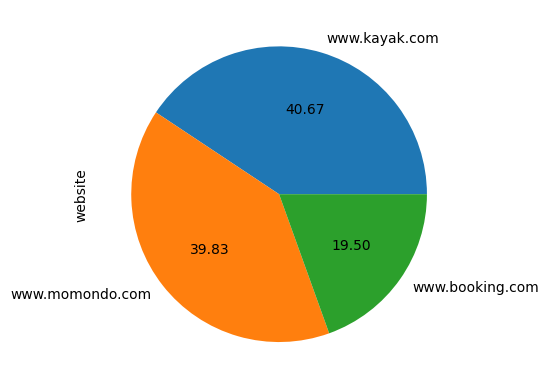

In [43]:
# sns.countplot(data=full_df, x='website')


full_df['website'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

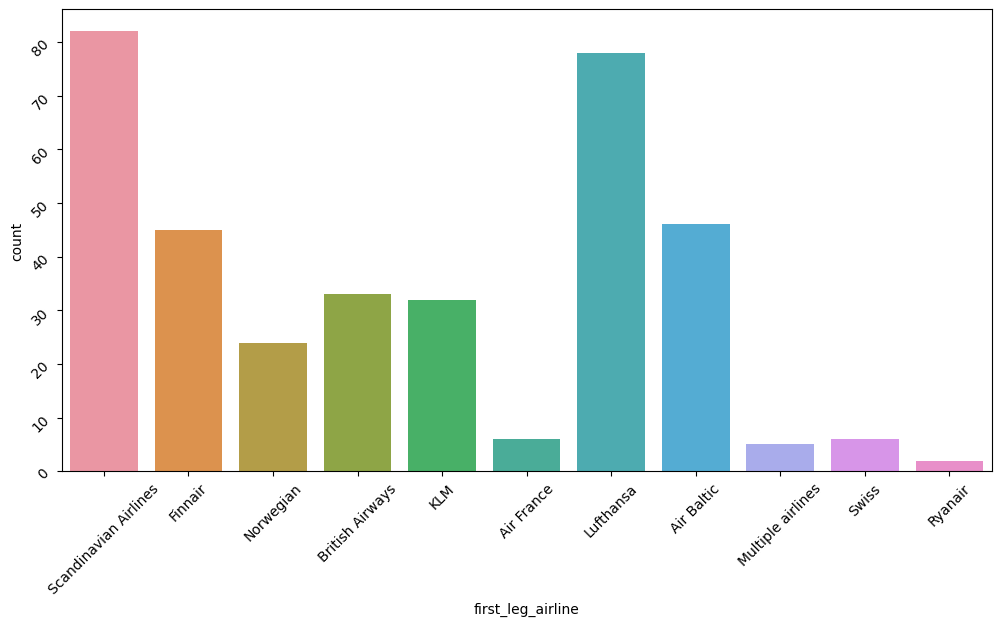

In [44]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=full_df, x='first_leg_airline')
ax.tick_params(rotation=45)

plt.show()

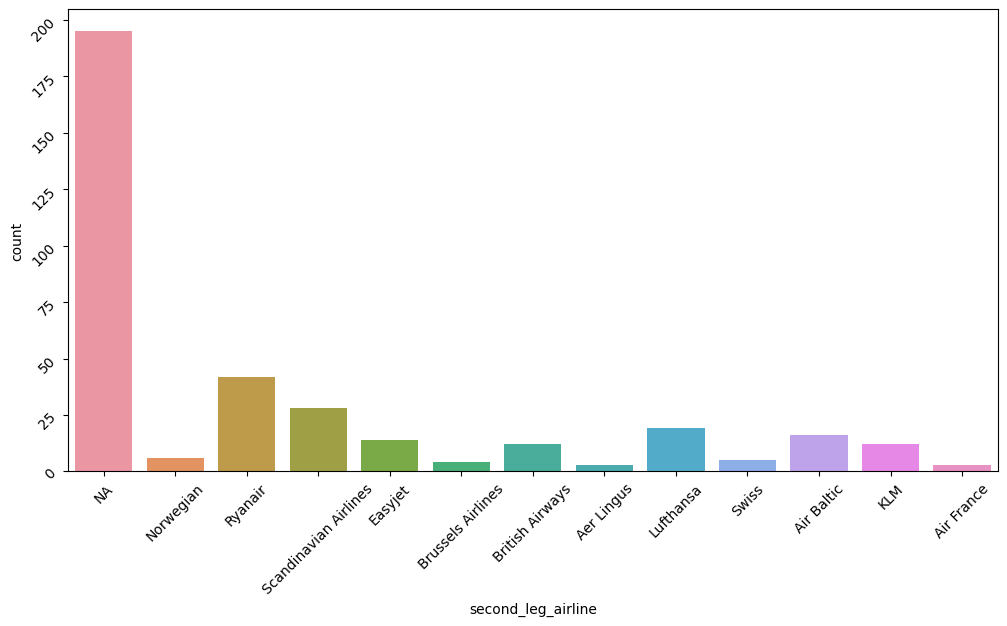

In [45]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=full_df, x='second_leg_airline')
ax.tick_params(rotation=45)

plt.show()

<Axes: xlabel='num_of_stops', ylabel='count'>

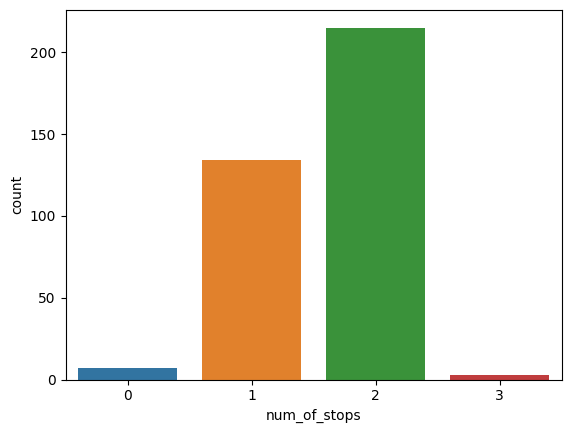

In [46]:
sns.countplot(data=full_df, x='num_of_stops')




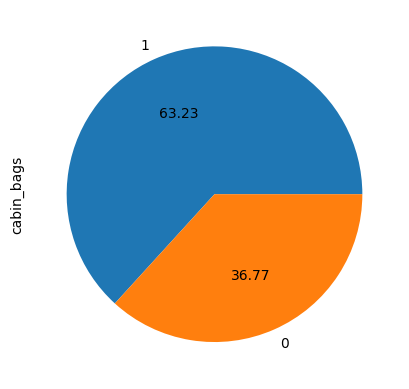

In [47]:
full_df['cabin_bags'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

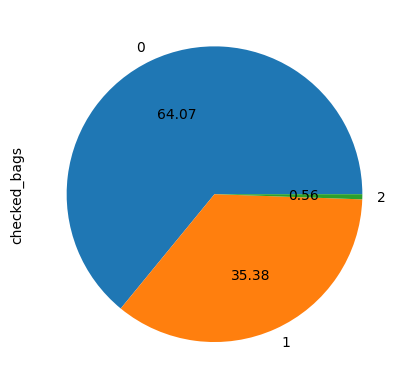

In [48]:
full_df['checked_bags'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()


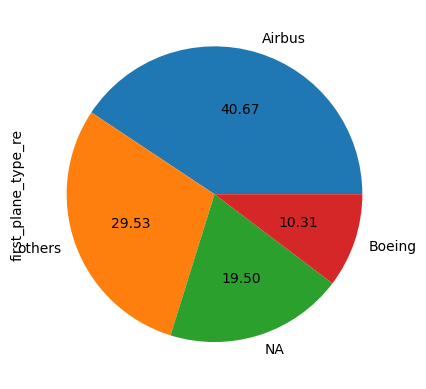

In [49]:
full_df['first_plane_type_re'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()


<Axes: ylabel='second_plane_type_re'>

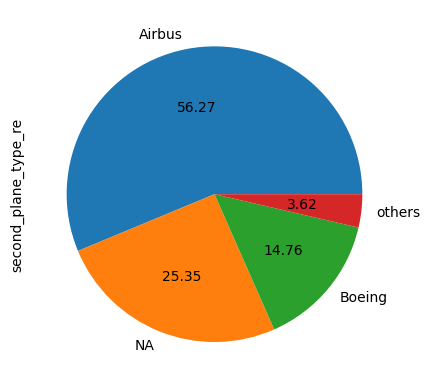

In [50]:
full_df['second_plane_type_re'].value_counts().plot(kind="pie", autopct="%.2f")

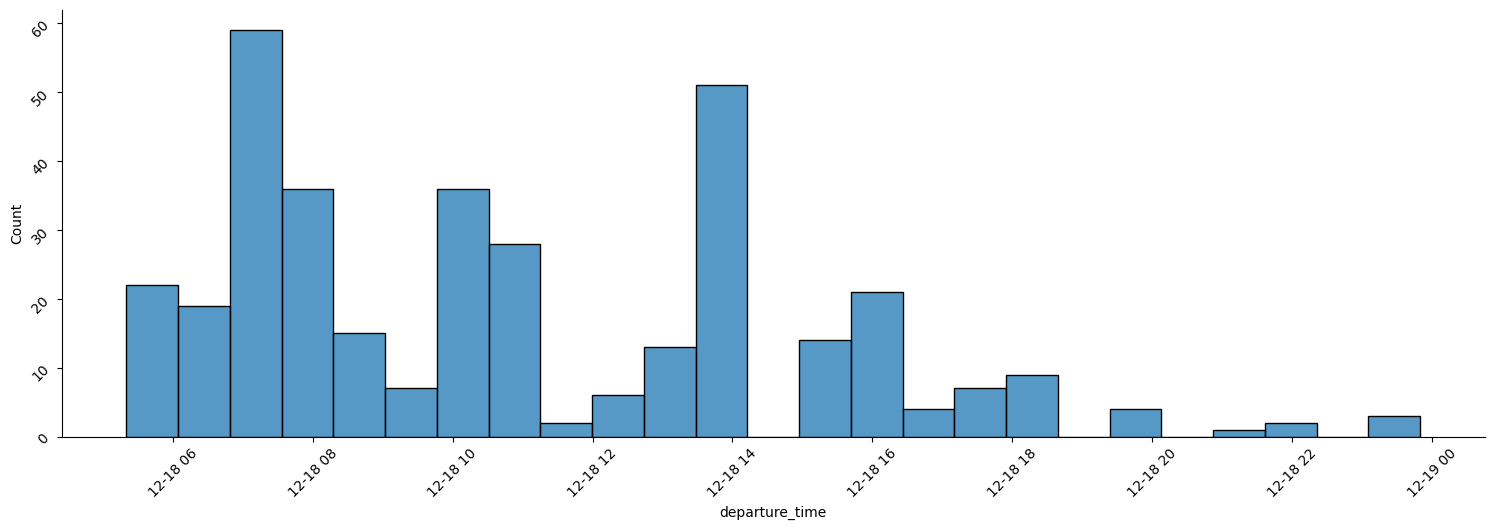

In [51]:
ax = sns.displot(data=full_df, x='departure_time',kde=False,bins=25,aspect=3,legend=True  )
ax.tick_params(rotation=45)

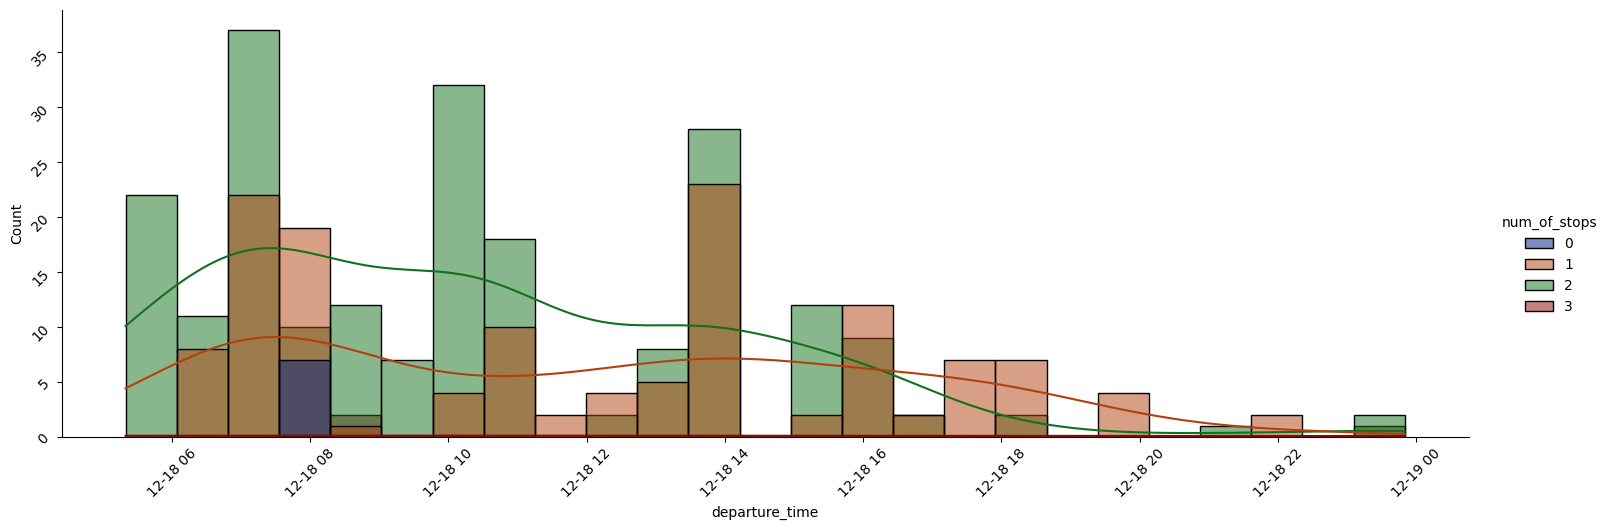

In [125]:
ax = sns.displot(data=full_df, x='departure_time',kde=True,bins=25,aspect=3,legend=True, hue='num_of_stops', palette = 'dark' )
ax.tick_params(rotation=45)

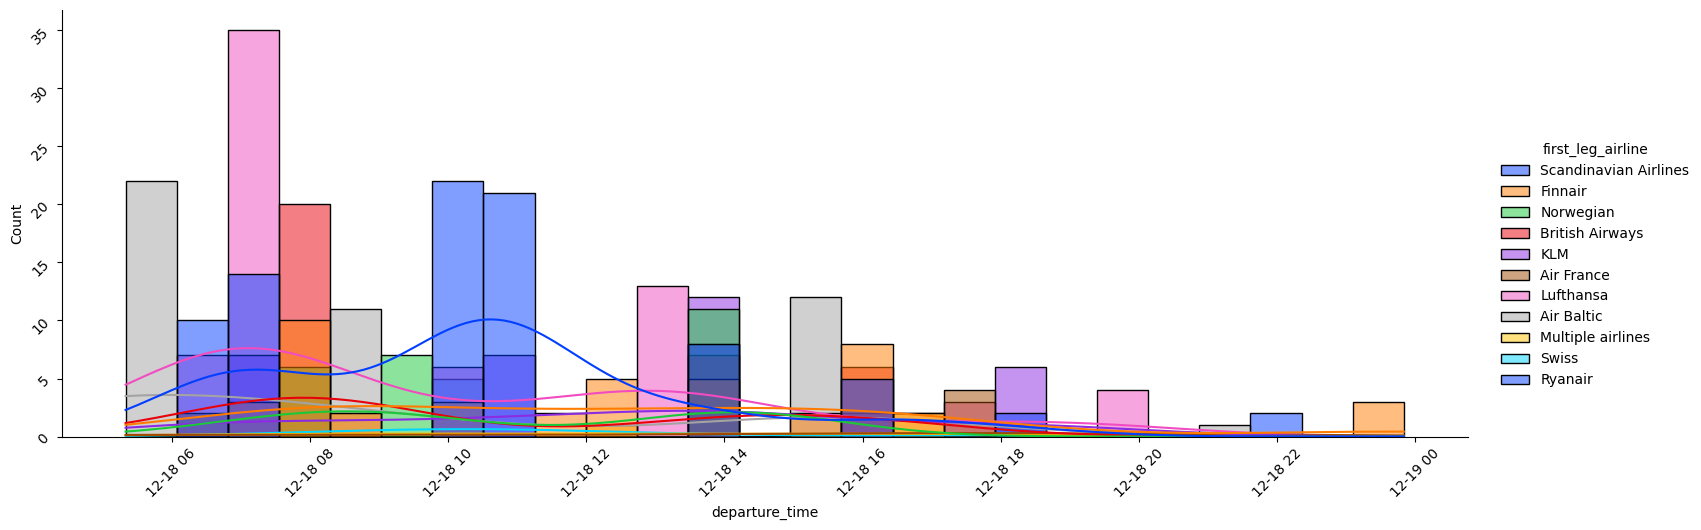

In [128]:
ax = sns.displot(data=full_df, x='departure_time',kde=True,bins=25,aspect=3,legend=True, hue='first_leg_airline', palette = 'bright' )
ax.tick_params(rotation=45)

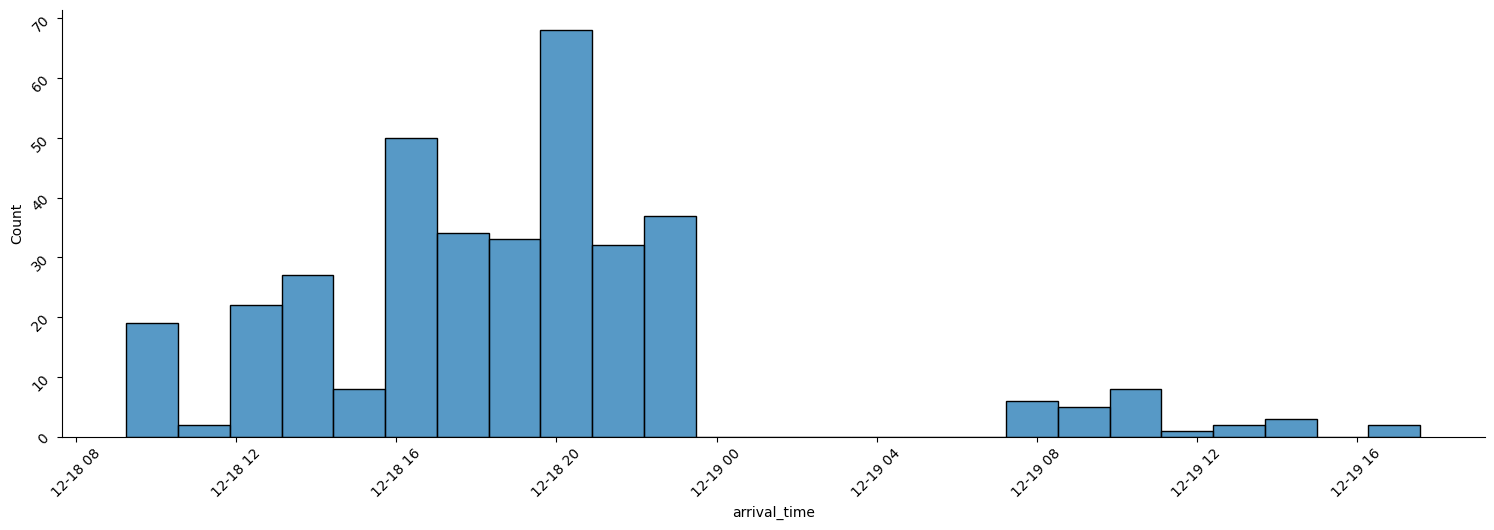

In [52]:
ax = sns.displot(data=full_df, x='arrival_time',bins=25,aspect=3,legend=True,kind='hist' )
ax.tick_params(rotation=45)

#### Numerical Data

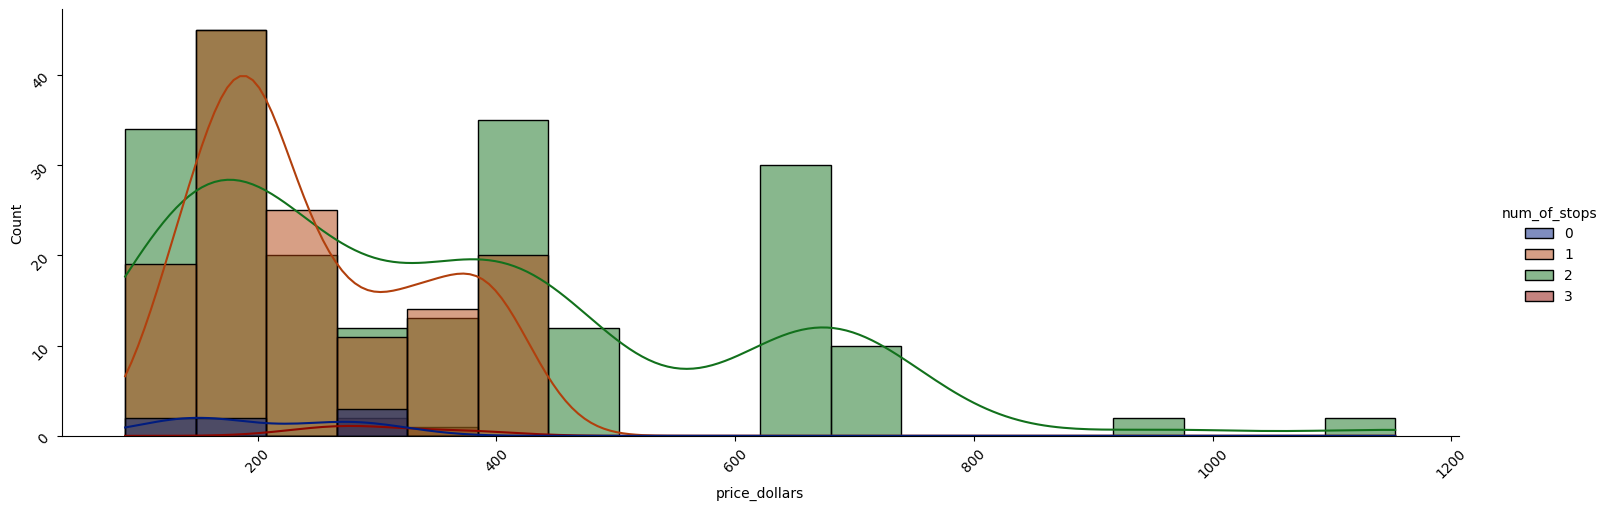

In [71]:


ax = sns.displot(data = full_df, x ='price_dollars', kind ='hist', hue ='num_of_stops',palette="dark", aspect=3,kde=True)
ax.tick_params(rotation=45)

plt.show()



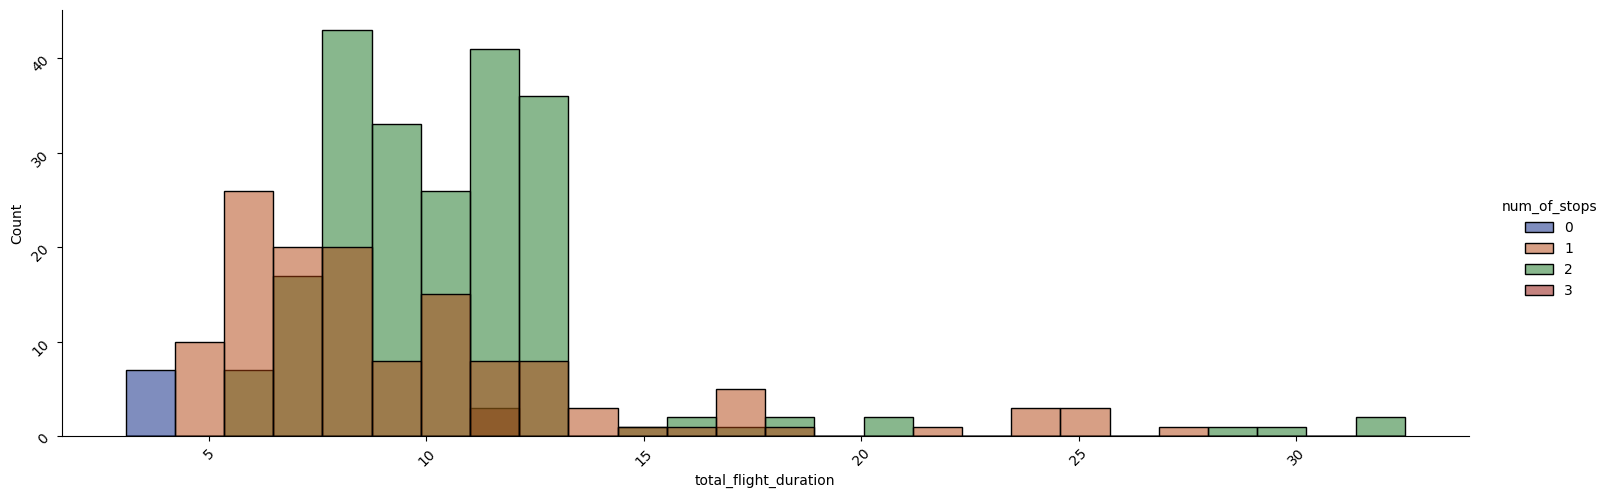

In [76]:
ax = sns.displot(data=full_df, x='total_flight_duration',aspect=3,legend=True, kind='hist',hue ='num_of_stops',  palette='dark' )
ax.tick_params(rotation=45)


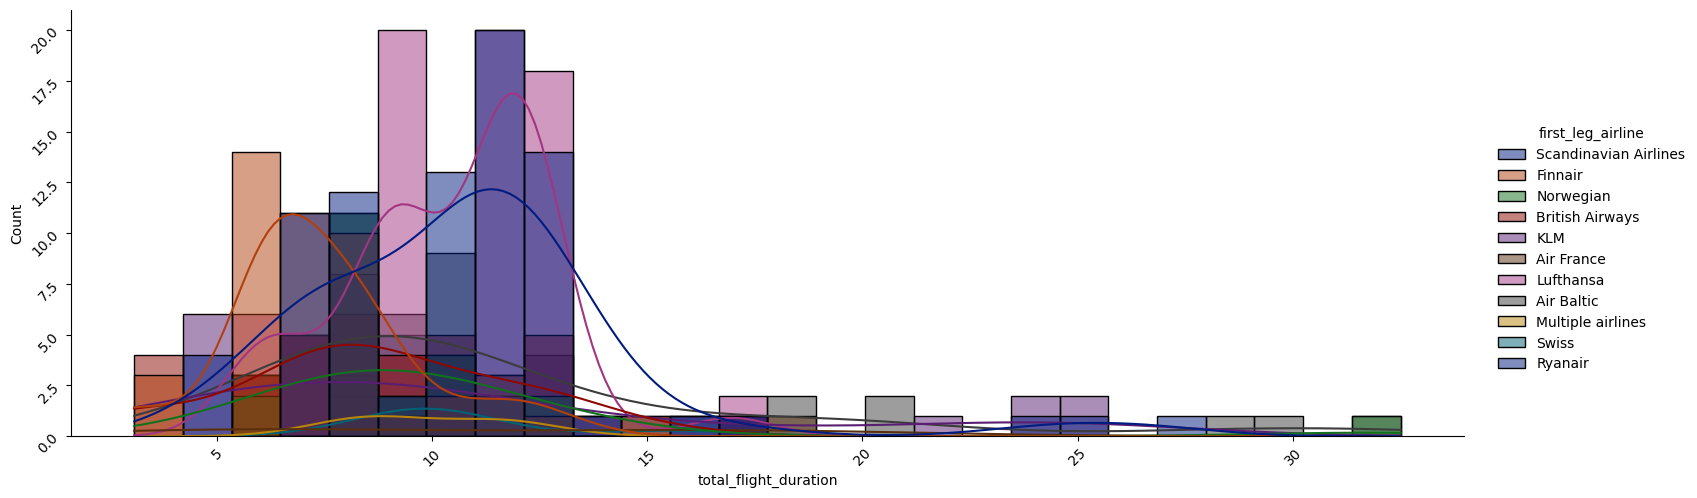

In [85]:
ax = sns.displot(data=full_df, x='total_flight_duration',aspect=3,legend=True, kind='hist',hue ='first_leg_airline', kde=True, palette='dark' )
ax.tick_params(rotation=45)

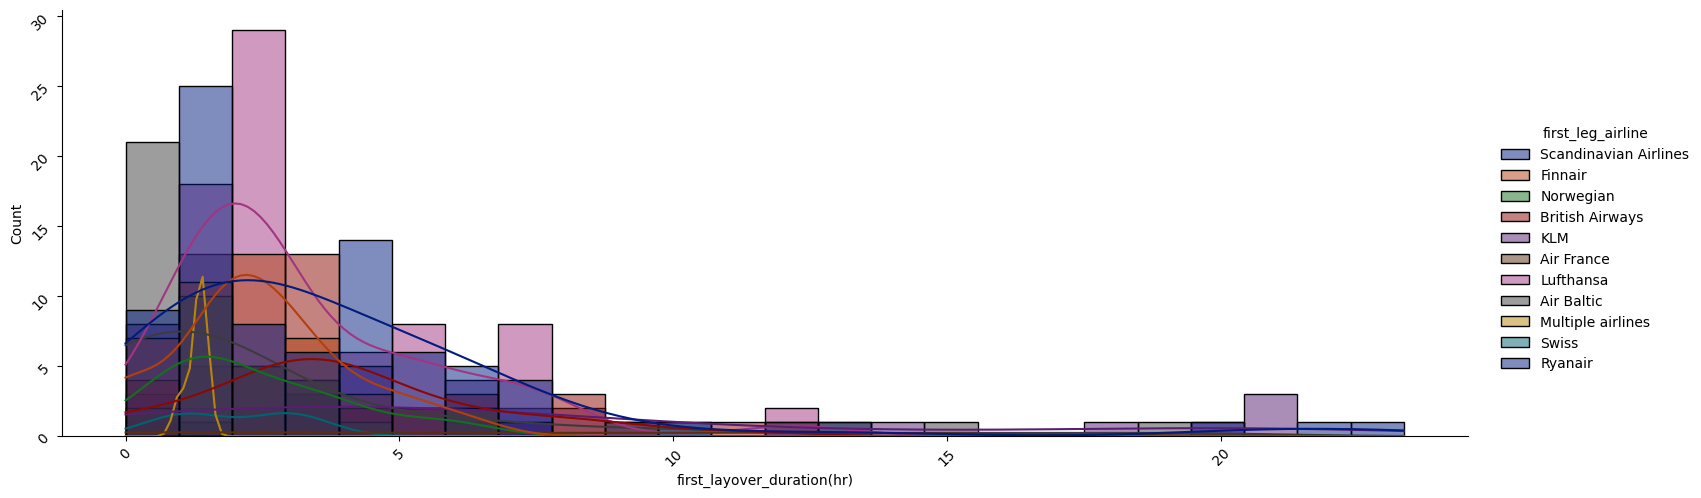

In [82]:
ax = sns.displot(data=full_df, x='first_layover_duration(hr)',aspect=3,legend=True,kind='hist', kde=True, hue= 'first_leg_airline', palette ="dark" )
ax.tick_params(rotation=45)

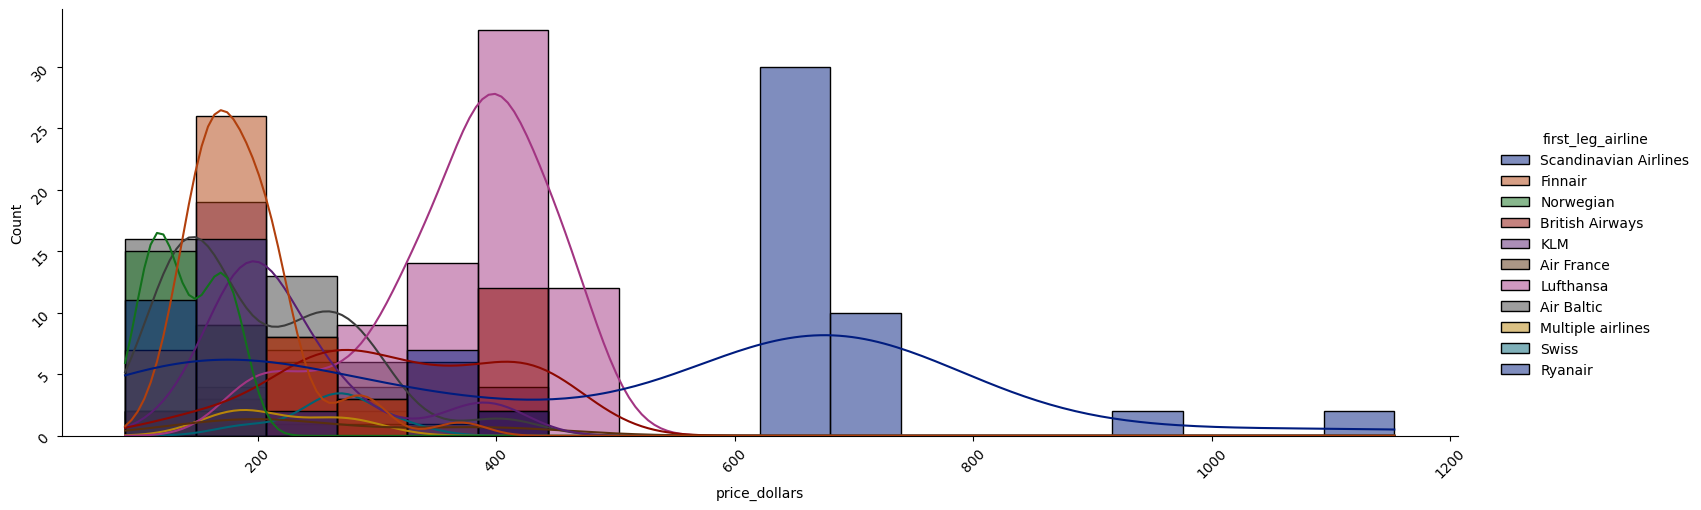

In [83]:
ax = sns.displot(data = full_df, x ='price_dollars', kind ='hist', hue ='first_leg_airline',palette="dark", aspect=3,kde=True)
ax.tick_params(rotation=45)

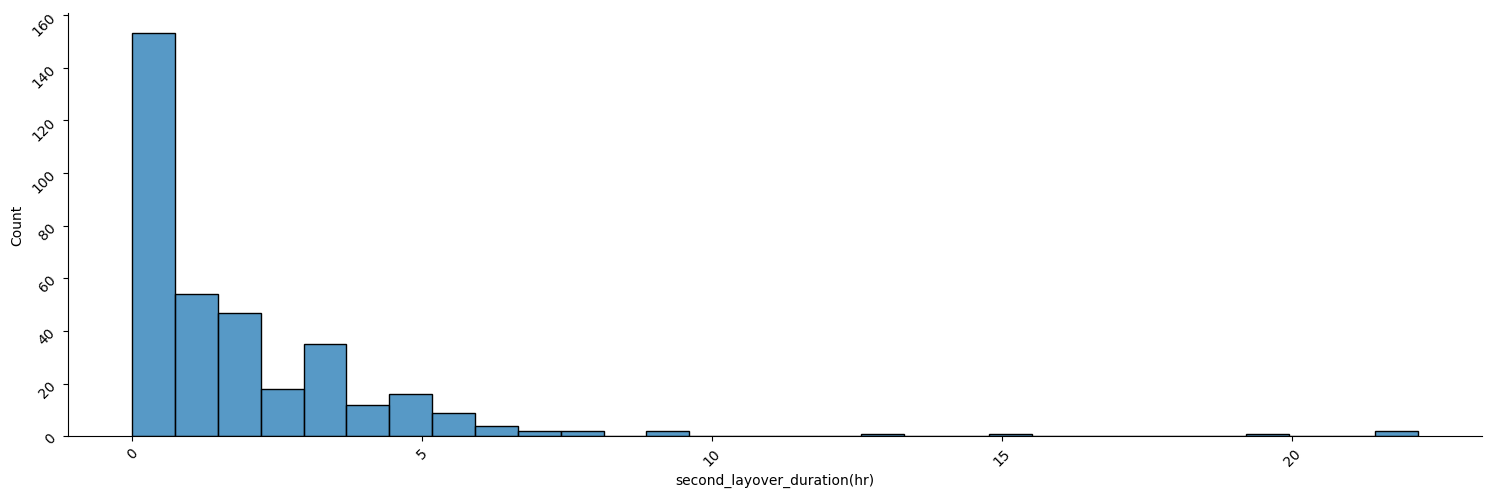

In [56]:
ax = sns.displot(data=full_df, x='second_layover_duration(hr)',aspect=3,legend=True,kind='hist', bins =30 )
ax.tick_params(rotation=45)

<Axes: xlabel='price_dollars', ylabel='total_flight_duration'>

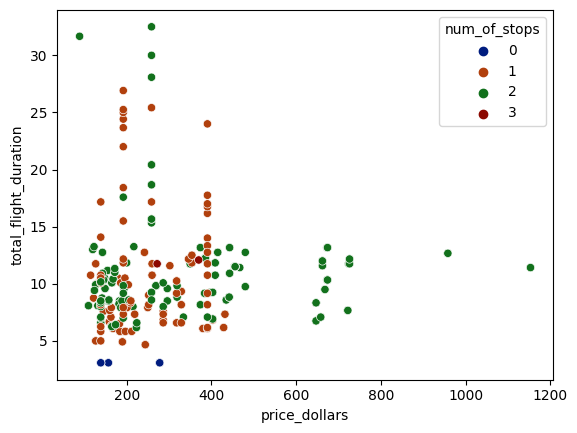

In [90]:
# sns.scatterplot(data=full_df, x='price_dollars', y='total_flight_duration', hue='num_of_stops',markers=True)


sns.scatterplot(data=full_df, x='price_dollars', y='total_flight_duration', hue='num_of_stops',markers=True, palette ='dark')


<Figure size 640x480 with 0 Axes>

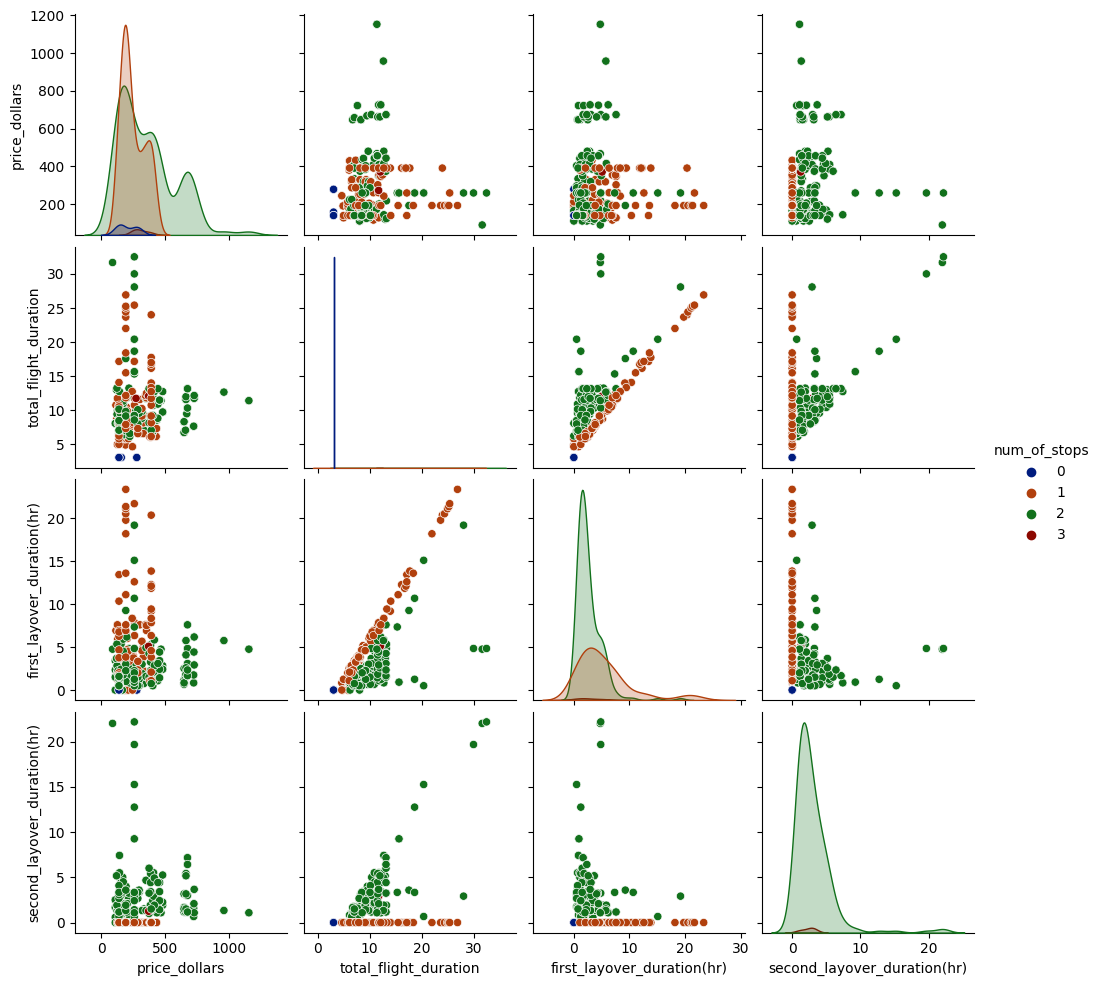

In [92]:
plt.figure()
cols = ['price_dollars','total_flight_duration','first_layover_duration(hr)', 'second_layover_duration(hr)','num_of_stops']

sns.pairplot(full_df[cols], hue ="num_of_stops",palette='dark')
plt.show()

In [ ]:
sns.heatmap(data= full_df)

#### Num vs Cat

<Axes: xlabel='num_of_stops', ylabel='price_dollars'>

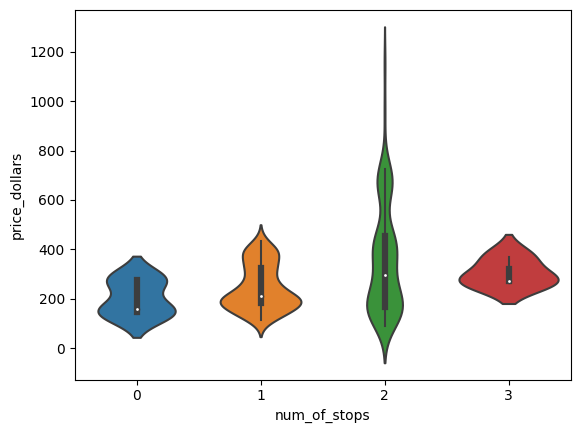

In [94]:
sns.violinplot(data=full_df, y='price_dollars', x='num_of_stops')

<Axes: xlabel='num_of_stops', ylabel='total_flight_duration'>

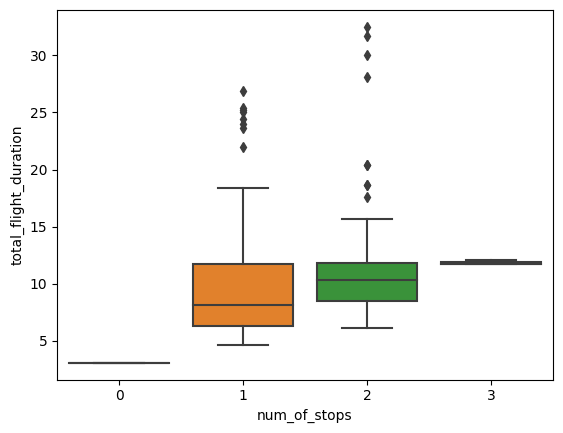

In [96]:

sns.boxplot(data=full_df, y='total_flight_duration', x='num_of_stops')

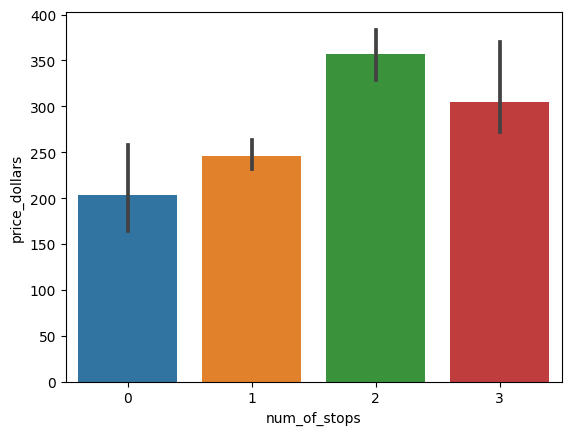

In [97]:
sns.barplot(data=full_df, x ='num_of_stops', y='price_dollars')
plt.show()

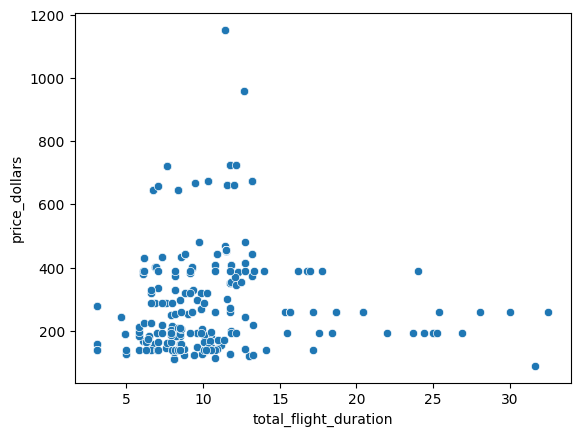

In [101]:

sns.scatterplot(data=full_df, x ='total_flight_duration', y='price_dollars')
plt.show()

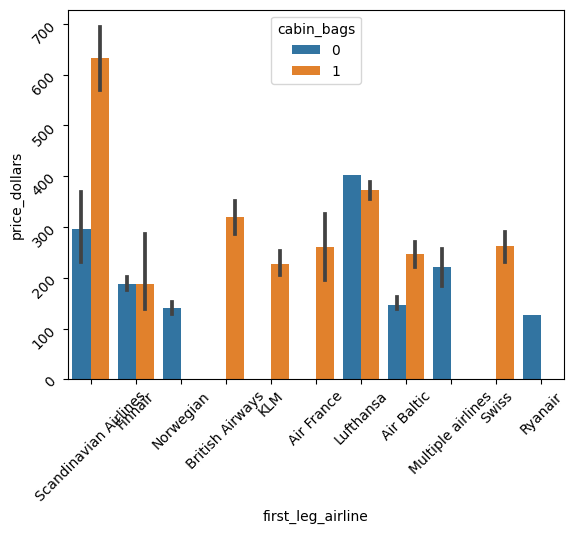

In [61]:
ax = sns.barplot(data=full_df, x ='first_leg_airline', y='price_dollars', hue='cabin_bags')
ax.tick_params(rotation=45)
plt.show()

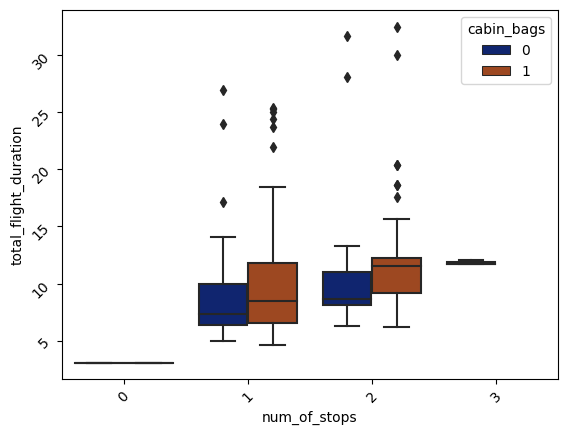

In [62]:
ax = sns.boxplot(data=full_df, y='total_flight_duration', x='num_of_stops' , hue= 'cabin_bags', palette="dark")
ax.tick_params(rotation=45)

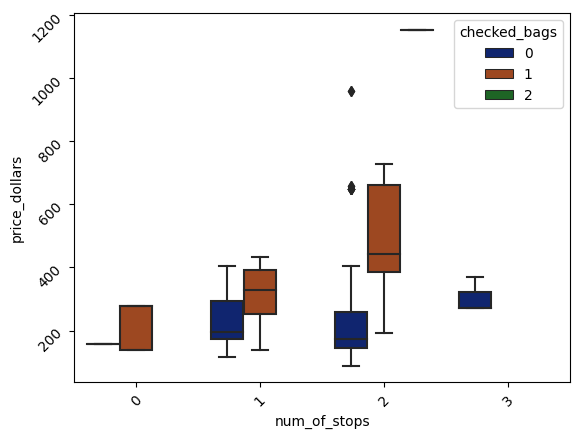

In [129]:
ax = sns.boxplot(data=full_df, y='price_dollars', x='num_of_stops' , hue= 'checked_bags', palette="dark")
ax.tick_params(rotation=45)

In [ ]:
full_df['price_dollars'] < 0

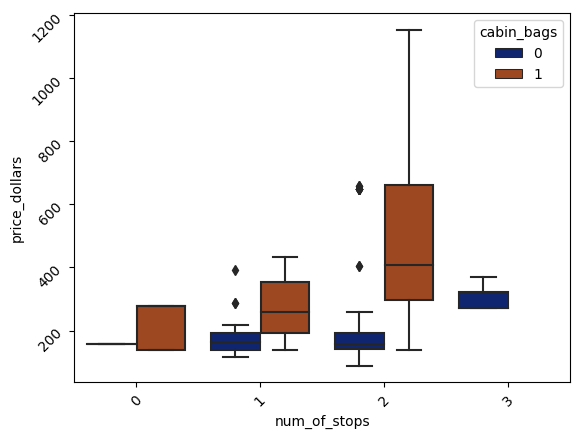

In [63]:
ax = sns.boxplot(data=full_df, y='price_dollars', x='num_of_stops' , hue= 'cabin_bags', palette="dark")
ax.tick_params(rotation=45)

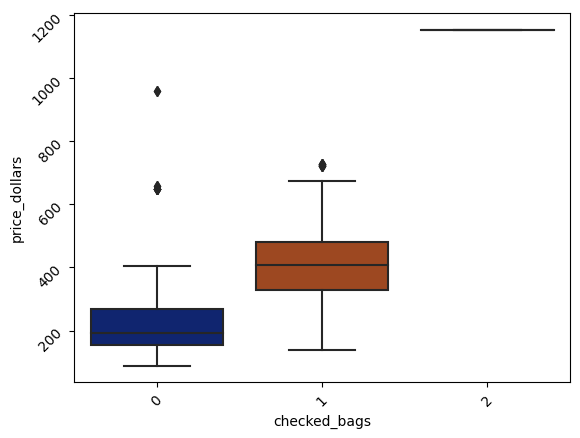

In [132]:
ax = sns.boxplot(data=full_df, y='price_dollars', x='checked_bags', palette="dark")
ax.tick_params(rotation=45)

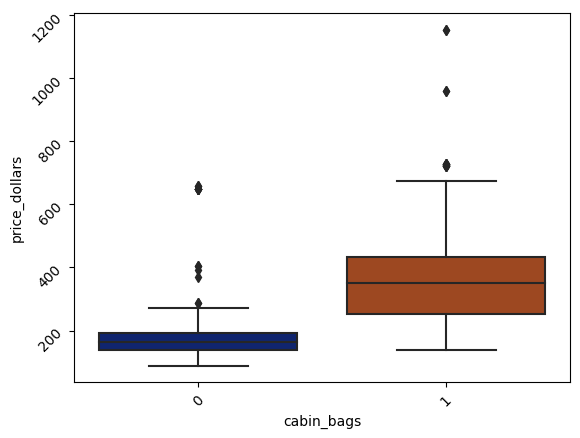

In [130]:
ax = sns.boxplot(data=full_df, y='price_dollars', x='cabin_bags', palette="dark")
ax.tick_params(rotation=45)

#### Interactive User Interface

+ the user  to perform the following task to give the user the list of “ideal” flight to the chosen city:  
+ The user inputs certain preferences for the flight, e.g., price ranges, trip duration ranges (how long from departure to destination), whether the flight is direct or has one or more stops (if it has stops then layover duration), flight company from available options etc.
  + price range
  + duration range
  + direct vs with stops
  + if with stops then layover duration
  + flight airline from available option


+  The user can choose the criteria based on which the flights should be sorted.
      + sorting criteria

+ The code returns the sorted list of all flights based on the above criteria.

+ The user should be able to input the earliest convenient time of departure on the departure day from your list, maximum travel time (trip duration from departure to destination) and choose a preferred airline company from available options and get the following information:

+ Cheapest flight for the preselected data with the following details:  § Total duration of the flight? § Whether the cheapest flight is direct or has one or more stops?  § If it is not direct how long is the layover and in which city? If it has multiple stops, print all layovers.  § Type of the aircraft where available, etc.   
+ Fastest flight for the preselected data with the same details as above.  

In [102]:
!pip install ipywidgets

In [103]:
import ipywidgets as widgets

In [107]:
view_data = full_df

In [108]:
padding_layout = widgets.Layout(padding='20px',margin='20px', spacing='20px')
range_width = widgets.Layout(width='600px')

In [110]:
from ipywidgets.widgets.widget_templates import LayoutProperties
price_wid = widgets.FloatRangeSlider(
    value=[80, 1500.00],
    min=0,
    max=2000.00,
    step=0.5,
    description='Price (USD) :',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    layout = padding_layout,

)
price_wid.layout= range_width

duration_wid = widgets.FloatRangeSlider(
    value=[0,50],
    min=0,
    max=50.00,
    step=0.5,
    description='Flight Duration (Hrs):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    layout = padding_layout,
)
duration_wid.layout= range_width
duration_wid.style.description_width = 'initial'  # 'initial' means wrap text when it exceeds widget width

direct_wid =widgets.Checkbox(
    value=False,
    description='Direct flights:',
    disabled=False,
    indent=False,
    layout = padding_layout,
)


stops_wid =widgets.Checkbox(
    value=True,
    description='Flights with stop(s):',
    disabled=False,
    indent=False,
    layout = padding_layout,
)

num_stops = widgets.Dropdown(
    options=['0','1', '2', '3'],
    value='0',
    description='Number of stops:',
    disabled= False,
    layout = padding_layout,
)
num_stops.style.description_width = 'initial'

order_by = widgets.Dropdown(
    options=['Price', 'Flight Duration', 'No of layovers' ],
    value='Price',
    description='Order result by:',
    disabled= False,
    layout = padding_layout,
)
order_by.style.description_width = 'initial'

order_type = widgets.Dropdown(
    options=['Ascending', 'Descending'],
    value='Ascending',
    description='Order:',
    disabled= False,
    layout = padding_layout,
)
order_type.style.description_width = 'initial'




layover_duration_wid = widgets.FloatRangeSlider(
    value=[0,0],
    min=0,
    max=50.00,
    step=0.5,
    description='Layover Duration (Hrs):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    layout = padding_layout,
)
layover_duration_wid.layout= range_width
layover_duration_wid.style.description_width = 'initial'  # 'initial' means wrap text when it exceeds widget width



airline_options = list(pd.concat([view_data['first_leg_airline'],view_data['second_leg_airline'],view_data['third_leg_airline']]).unique())


airline_select = widgets.SelectMultiple(
    options=airline_options,
    value=[airline_options[0]],  # Default selection(s)
    description='Select Airlines:',
    rows=5,  # Display all options in the widget
    disable = False,
    layout = padding_layout,
)
airline_select.style.description_width = 'initial'

field_options = list(view_data.columns)
field_select = widgets.SelectMultiple(
    options=field_options,
    value=[field_options[0]],  # Default selection(s)
    description='Select outputed attributes:',
    rows=5,  # Display all options in the widget
    disable = False,
    layout = padding_layout
)
field_select.style.description_width = 'initial'
field_select.layout= widgets.Layout(width='400px')

submit_button = widgets.Button(
    description='Submit',
    disabled= False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Enter',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)


In [111]:
#  Function to enable/disable the other widget based on the checkbox value
def disable_stops(change):
    if change.new:  # If the checkbox is checked (True)
        num_stops.disabled = False
        layover_duration_wid.disabled = False
    else:
        num_stops.disabled = True
        layover_duration_wid.disabled = False

def handle_multiple_selection(change):
    selected_options = change.new
    # Handle the selected options as needed
    print("Selected options:", selected_options)

# Attach the function to the widget's value
airline_select.observe(handle_multiple_selection, names='value')
field_select.observe(handle_multiple_selection, names='value')

# Attach the toggle_widget function to the checkbox's value
stops_wid.observe(disable_stops, names='value')

In [112]:
def get_result(price_range:tuple, duration_range:tuple, direct_flights:bool, with_stops:bool, num_stops:int,
                   layover_duration:tuple,airlines:tuple,order_by:str, order_type:str, output_attributes:tuple)->pd.DataFrame():



                   if direct_flights:
                    min_stops = 0
                    max_stops = 0
                    filtered_values = np.where(((view_data['price_dollars']>= price_range[0]) & (view_data['price_dollars']<= price_range[1])) &
                                              ((view_data['total_flight_duration'] >= duration_range[0]) & (view_data['total_flight_duration'] <= duration_range[1])) &
                                              ((view_data['num_of_stops'] == min_stops)) &  (view_data['first_leg_airline'].isin( airlines))
                                               )
                   else:
                    min_stops = 0
                    max_stops = num_stops

                    filtered_values = np.where(((view_data['price_dollars']>= price_range[0]) & (view_data['price_dollars']<= price_range[1])) &
                                                ((view_data['total_flight_duration'] >= duration_range[0]) & (view_data['total_flight_duration'] <= duration_range[1])) &
                                                ((view_data['num_of_stops'] >= min_stops) & (view_data['num_of_stops'] <= max_stops)) &
                                                (((view_data['first_layover_duration(hr)']+view_data['second_leg_duration(hr)'])>=layover_duration[0]) &
                                                 ((view_data['first_layover_duration(hr)']+view_data['second_leg_duration(hr)'])<=layover_duration[1]))&
                                                 (view_data['first_leg_airline'].isin(airlines)))

                   filtered_data = view_data.loc[filtered_values]


                   if order_type == 'Ascending':
                    if order_by == 'Price':
                      sorted__data = filtered_data.sort_values(by = ['price_dollars'], ascending = [True], na_position='last', kind='quicksort', ignore_index=True)
                    elif order_by == 'Flight Duration':
                      sorted__data = filtered_data.sort_values(by = ['total_flight_duration'], ascending = [True], na_position='last', kind='quicksort', ignore_index=True)
                    elif order_by == 'No of layovers':
                      sorted__data = filtered_data.sort_values(by = ['num_of_stops'], ascending = [True], na_position='last', kind='quicksort', ignore_index=True)
                    else:
                       sorted__data = filtered_data.sort_values(by = ['price_dollars'], ascending = [True], na_position='last', kind='quicksort', ignore_index=True)
                   else:
                    if order_by == 'Price':
                      sorted__data = filtered_data.sort_values(by = ['price_dollars'], ascending = [False], na_position='last', kind='quicksort', ignore_index=True)
                    elif order_by == 'Flight Duration':
                      sorted__data = filtered_data.sort_values(by = ['total_flight_duration'], ascending = [False], na_position='last', kind='quicksort', ignore_index=True)
                    elif order_by == 'No of layovers':
                      sorted__data = filtered_data.sort_values(by = ['num_of_stops'], ascending = [False], na_position='last', kind='quicksort', ignore_index=True)
                    else:
                       sorted__data = filtered_data.sort_values(by = ['price_dollars'], ascending = [False], na_position='last', kind='quicksort', ignore_index=True)

                   return sorted__data


In [113]:
Var_box1 = widgets.VBox([price_wid,duration_wid])

Hor_box1 = widgets.HBox([ direct_wid,stops_wid,num_stops, order_by, order_type])

Hor_box2 = widgets.HBox([layover_duration_wid,airline_select, field_select])
Hor_box2.layout.justify_content = 'flex-start'
output = widgets.Output(layout={'border': '1px solid black'})



In [114]:
display(Var_box1, Hor_box1,Hor_box2,submit_button, output)
def on_clicked(b):
  global result
  result = get_result(price_wid.value, duration_wid.value, direct_wid.value, stops_wid.value,
                          int(num_stops.value),layover_duration_wid.value, airline_select.value, order_by.value, order_type.value, field_select.value)

  with output:
    output.clear_output()
    print(f'There are {result.shape[0]} flight based on the selection criteria submited')
    display(result[list(field_select.value)])
  # return result

submit_button.on_click(on_clicked)

Button(button_style='success', description='Submit', icon='check', style=ButtonStyle(), tooltip='Enter')

Output(layout=Layout(border='1px solid black'))

Selected options: ('website', 'airline', 'departure_time')
Selected options: ('website', 'airline', 'departure_time', 'arrival_time', 'num_of_stops', 'total_flight_duration', 'cabin_bags')
Selected options: ('website', 'airline', 'departure_time', 'arrival_time', 'num_of_stops', 'total_flight_duration', 'cabin_bags', 'checked_bags', 'personal_items', 'price_dollars', 'flight_class', 'first_layover_duration(hr)')
Selected options: ('website', 'airline', 'departure_time', 'arrival_time', 'num_of_stops', 'total_flight_duration', 'cabin_bags', 'checked_bags', 'personal_items', 'price_dollars', 'flight_class', 'first_layover_duration(hr)', 'second_layover_duration(hr)', 'first_layover_location', 'second_layover_location', 'first_leg_duration(hr)', 'second_leg_duration(hr)')
Selected options: ('Scandinavian Airlines', 'Finnair', 'Norwegian', 'British Airways')
Selected options: ('Scandinavian Airlines', 'Finnair', 'Norwegian', 'British Airways', 'KLM')
Selected options: ('Scandinavian Airlin

In [115]:
result.head()
# dates = list(result['start_time'])
# print (dates)

,website,airline,departure_time,arrival_time,num_of_stops,total_flight_duration,cabin_bags,checked_bags,personal_items,price_dollars,...,third_leg_airline,first_layover_airport_name,second_layover_airport_name,first_layover_airport_city,second_layover_airport_city,first_layover_airport_country,second_layover_airport_country,first_plane_type_re,second_plane_type_re,third_plane_type_re
0,www.kayak.com,"airBaltic, Ryanair",2023-12-18 05:20:00,2023-12-18 16:05:00,2,12.75,0,0,NA,143.0,...,NA,Riga Intl,Kastrup,Riga,Copenhagen,Latvia,Denmark,Airbus,Airbus,Boeing
1,www.momondo.com,"airBaltic, Ryanair",2023-12-18 05:20:00,2023-12-18 16:05:00,2,12.75,0,0,NA,143.0,...,NA,Riga Intl,Kastrup,Riga,Copenhagen,Latvia,Denmark,Airbus,Airbus,Boeing
2,www.kayak.com,Lufthansa,2023-12-18 07:00:00,2023-12-18 17:15:00,2,12.25,1,1,NA,385.0,...,NA,Franz Josef Strauss,Frankfurt Main,Munich,Frankfurt,Germany,Germany,Airbus,Airbus,Airbus
3,www.momondo.com,Lufthansa,2023-12-18 07:00:00,2023-12-18 17:15:00,2,12.25,1,1,NA,386.0,...,NA,Franz Josef Strauss,Frankfurt Main,Munich,Frankfurt,Germany,Germany,Airbus,Airbus,Airbus
4,www.momondo.com,Lufthansa,2023-12-18 12:45:00,2023-12-18 22:15:00,2,11.50,1,1,NA,456.0,...,NA,Franz Josef Strauss,Frankfurt Main,Munich,Frankfurt,Germany,Germany,Airbus,Boeing,Airbus


In [116]:
result_copy = result

In [118]:
import datetime
dates = list(result['departure_time'].unique())
dates.sort()
options = [(datetime.datetime.utcfromtimestamp(i.astype('datetime64[s]').astype(int)).strftime('%H:%M')) for i in dates]
time_widget = widgets.SelectionRangeSlider(
    options=options,
    index=(0, len(dates)-1),
    description='Departure time:',
    disabled=False,
    orientation='horizontal',
    readout=True,
    layout = padding_layout,
)
time_widget.layout= range_width
time_widget.style.description_width = 'initial'  # 'initial' means wrap text when it exceeds widget width


duration_result = list(result['total_flight_duration'].unique())
duration_result.sort()
options = [i for i in duration_result]
duration_widget = widgets.SelectionRangeSlider(
    options=options,
    index=(0, len(duration_result)-1),
    description='Flight Duration(Hrs):',
    disabled=False,
    orientation='horizontal',
    readout=True,
    layout = padding_layout,
)
duration_widget.layout = range_width
duration_widget.style.description_width = 'initial'

airline_options_2 = list(pd.concat([result['first_leg_airline'],result['second_leg_airline'],result['third_leg_airline']]).unique())

airline_widget = widgets.SelectMultiple(
    options=airline_options_2,
    value=[airline_options_2[0]],  # Default selection(s)
    description='Select Airlines:',
    rows=5,  # Display all options in the widget
    disable = False,
    layout = padding_layout,
)
airline_widget.style.description_width = 'initial'




In [119]:
Hor_box3 = widgets.HBox([time_widget, duration_widget])

In [147]:
def get_cheapest_fastest(departure_time:tuple, duration_range:tuple,airlines:tuple)->pd.DataFrame():
  date_format = '%Y-%m-%d %H:%M'
  min_departure_time = datetime.datetime.strptime(f"2023-12-18 {departure_time[0]}",date_format)
  max_departure_time = datetime.datetime.strptime(f"2023-12-18 {departure_time[1]}",date_format)


  filtered_values = np.where(((result['departure_time']>= min_departure_time) & (result['departure_time']<= max_departure_time)) &
                                              ((result['total_flight_duration'] >= duration_range[0]) & (result['total_flight_duration'] <= duration_range[1])) &
                                              ((result['first_leg_airline'].isin( airlines)) | (result['second_leg_airline'].isin( airlines)) | (result['third_leg_airline'].isin( airlines)))
                                               )
  filtered_data = result.loc[filtered_values]

  cheapest_flight = sorted__data = filtered_data.sort_values(by = ['price_dollars'], ascending = [True], na_position='last', kind='quicksort', ignore_index=True).head(1)
  cheapest_flight['label'] = 'Cheapest'

  fastest_flight = filtered_data.sort_values(by = ['total_flight_duration'], ascending = [True], na_position='last', kind='quicksort', ignore_index=True).head(1)
  fastest_flight['label'] = 'Fastest'
  out = pd.concat([cheapest_flight,fastest_flight], ignore_index =True)

  show_columns = []

  for index, row in out.iterrows():

    if row['num_of_stops'] == 0:
      row['num_of_stops'] = 'Direct'
      show_columns = ['label','price_dollars','departure_time','num_of_stops','arrival_time','total_flight_duration','airline',
              'cabin_bags','checked_bags','flight_class','website']
    elif  row['num_of_stops'] == 1:
      show_columns = ['label','price_dollars','departure_time','num_of_stops','arrival_time','total_flight_duration','airline','first_layover_duration(hr)',
       'cabin_bags','checked_bags','flight_class','first_layover_airport_name', 'first_layover_airport_city', 'first_layover_airport_country','website']
    else:
      show_columns = ['label','price_dollars','departure_time','num_of_stops','arrival_time','total_flight_duration','airline','first_layover_duration(hr)',
       'second_layover_duration(hr)','cabin_bags','checked_bags','flight_class','first_layover_airport_name', 'first_layover_airport_city', 'first_layover_airport_country',
        'second_layover_airport_name','second_layover_airport_city',
       'second_layover_airport_country','website']



  display (out[show_columns])


In [150]:
new_output = widgets.interactive_output(get_cheapest_fastest,{'departure_time':time_widget, 'duration_range':duration_widget, 'airlines':airline_widget})
display(Hor_box3, airline_widget, new_output)

SelectMultiple(description='Select Airlines:', index=(3,), layout=Layout(margin='20px', padding='20px'), optio…

Output()